In [3]:
from models_wg import *
import pandas as pd
from pandas import DataFrame
import dateutil.parser
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.api as sm
from preprocess import train_test_split
from preprocess import n_series
from datetime import datetime, timedelta 
from sklearn.metrics import mean_absolute_error
from collections import OrderedDict
import os
import sys
import csv 
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

In [4]:
def plot(df,kunag,matnr,n,p,d,q,sl,folder):        
        test1 = train_test_split(df,kunag,matnr,n)[1]
        train = train_test_split(df,kunag,matnr,n)[0]
        plt.figure(figsize=(18,10))
        plt.plot(train.set_index("date")['quantity'], label='Train',marker = '.')
        plt.plot(test1.set_index("date")['quantity'], label='Test',marker = '.')
        
        output1,rms1,mae1 = sarima(df,kunag,matnr,n,p,q,d)
        output2,rms2,mae2 = prophet(df, kunag,matnr,n,0.1)
        y_hat_avg1 = output1
        plt.plot(y_hat_avg1.set_index("date")['pred_column'], label='arima011',marker = '.')
        y_hat_avg2 = output2
        plt.plot(y_hat_avg2.set_index("date")['pred_column'], label='prophet',marker = '.')
#         output1,rms1,mae1 = sarima(df,kunag,matnr,n,p,q,d)
        

#         output1,rms1,mae1 = moving_average(df,kunag,matnr,16,21)
#         y_hat_avg1 = output1
#         plt.plot(y_hat_avg1.set_index("date")['pred_column'], label='MA_21',marker = '.')

#         output2,rms2,mae2 = moving_average(df,kunag,matnr,16,23)
#         y_hat_avg2 = output2
#         plt.plot(y_hat_avg2.set_index("date")['pred_column'], label='MA_23',marker = '.')

#         output3,rms3,mae3 = moving_average(df,kunag,matnr,16,25)
#         y_hat_avg3 = output3
#         plt.plot(y_hat_avg3.set_index("date")['pred_column'], label='MA_25',marker = '.')

#         output1,rms1,mae1 = sarima(df,kunag,matnr,n,p,q,d)
#         output2,rms2,mae2 = ses(df,kunag,matnr,n,sl)
#         output3,rms3,mae3 = prophet(df, kunag,matnr,n,sps)
#         output4,rms4,mae4 = croston_tsb(df,kunag,matnr,16,0.2,0.4)

#         y_hat_avg1 = output1
#         plt.plot(y_hat_avg1.set_index("date")['pred_column'], label='SARIMA_' + str(order),marker = '.')
#         y_hat_avg2 = output2
#         plt.plot(y_hat_avg2.set_index("date")['pred_column'], label='SES_' + str(sl),marker = '.')
#         y_hat_avg3 = output3
#         plt.plot(y_hat_avg3.set_index("date")['pred_column'], label='Prophet_' + str(sps),marker = '.',color = "blue")
#         output4,rms4,mae4 = croston_tsb(df,kunag,matnr,16,0.2,0.4)
#         y_hat_avg4 = output4
#         plt.plot(y_hat_avg4.set_index("date")['pred_column'], label='Croston TSM_' +str(0.2)+"_"+str(0.4),marker = '.')
#         output5,rms5,mae5 = croston_tsb(df,kunag,matnr,16,0.2,0.2)
#         y_hat_avg5 = output5
#         plt.plot(y_hat_avg5.set_index("date")['pred_column'], label='Croston TSM_' +str(0.2)+"_"+str(0.2),marker = '.')
#         output6,rms6,mae6 = croston_tsb(df,kunag,matnr,16,0.3,0.3)
#         y_hat_avg6 = output6
#         plt.plot(y_hat_avg6.set_index("date")['pred_column'], label='Croston TSM_' +str(0.3)+"_"+str(0.3),marker = '.')
#         output7,rms7,mae7 = croston_tsb(df,kunag,matnr,16,0.2,0.3)
#         y_hat_avg7 = output7
#         plt.plot(y_hat_avg7.set_index("date")['pred_column'], label='Croston TSM_' +str(0.2)+"_"+str(0.3),marker = '.')
#         output8,rms8,mae8 = croston_tsb(df,kunag,matnr,16,0.3,0.2)
#         y_hat_avg8 = output8
#         plt.plot(y_hat_avg8.set_index("date")['pred_column'], label='Croston TSM_' +str(0.3)+"_"+str(0.2),marker = '.')
        
        
        
        
        
        plt.legend(loc='best')
        plt.title("MA")
        index = str(kunag) + "-" + str(matnr)
        plt.savefig(folder +"/" + 'Graph_{}.png'.format(index), format="PNG")  
        return mae1,mae2
    #         plt.show()

count 1
index :  500056565_100278


/home/rahul/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


       kunag   matnr  arima011  prophet
0  500056565  100278       1.0    1.448
count 2
index :  500056565_116366
       kunag   matnr  arima011  prophet
0  500056565  116366      1.67    1.679
count 3
index :  500056565_117803
       kunag   matnr  arima011  prophet
0  500056565  117803     0.507    0.515
count 4
index :  500056565_119826
       kunag   matnr  arima011  prophet
0  500056565  119826     0.422    0.456
count 5
index :  500056565_132218
       kunag   matnr  arima011  prophet
0  500056565  132218     0.589    0.609
count 6
index :  500056565_132530
       kunag   matnr  arima011  prophet
0  500056565  132530     2.999    2.503
count 7
index :  500056565_132532
       kunag   matnr  arima011  prophet
0  500056565  132532     0.923    0.859
count 8
index :  500056565_132543
       kunag   matnr  arima011  prophet
0  500056565  132543     0.689    0.684
count 9
index :  500056565_133115
       kunag   matnr  arima011  prophet
0  500056565  133115     1.232    1.382
count 10

/home/rahul/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


       kunag   matnr  arima011  prophet
0  500057326  119826     0.629    0.604
count 22
index :  500057326_132530
       kunag   matnr  arima011  prophet
0  500057326  132530     7.412     6.78
count 23
index :  500057326_144484
       kunag   matnr  arima011  prophet
0  500057326  144484     1.365    1.446
count 24
index :  500057326_145278
       kunag   matnr  arima011  prophet
0  500057326  145278     0.511    0.527
count 25
index :  500057326_146858
       kunag   matnr  arima011  prophet
0  500057326  146858     0.632    0.634
count 26
index :  500057326_151095
       kunag   matnr  arima011  prophet
0  500057326  151095     0.823    0.859
count 27
index :  500057578_112260
       kunag   matnr  arima011  prophet
0  500057578  112260     0.623    1.091
count 28
index :  500057578_119826
       kunag   matnr  arima011  prophet
0  500057578  119826     0.342    0.441
count 29
index :  500057578_132530
       kunag   matnr  arima011  prophet
0  500057578  132530     2.659    1.694


/home/rahul/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


       kunag   matnr  arima011  prophet
0  500057582  134926     0.537    0.518
count 60
index :  500057583_117803
       kunag   matnr  arima011  prophet
0  500057583  117803     1.713     1.73
count 61
index :  500057583_117808
       kunag   matnr  arima011  prophet
0  500057583  117808     0.778    0.802
count 62
index :  500057583_119826
       kunag   matnr  arima011  prophet
0  500057583  119826     1.747    1.824
count 63
index :  500058324_117803
       kunag   matnr  arima011  prophet
0  500058324  117803     0.473    0.484
count 64
index :  500058324_119826
       kunag   matnr  arima011  prophet
0  500058324  119826     0.475    0.497
count 65
index :  500058324_132530
       kunag   matnr  arima011  prophet
0  500058324  132530     2.428    2.152
count 66
index :  500058324_132606
       kunag   matnr  arima011  prophet
0  500058324  132606     0.591    0.555
count 67
index :  500058324_133129
       kunag   matnr  arima011  prophet
0  500058324  133129     0.567    0.542


/home/rahul/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


       kunag   matnr  arima011  prophet
0  500058324  134926     0.622    0.631
count 70
index :  500058324_144484
       kunag   matnr  arima011  prophet
0  500058324  144484     0.778    0.793
count 71
index :  500058324_145278
       kunag   matnr  arima011  prophet
0  500058324  145278     0.502    0.508
count 72
index :  500058324_146858
       kunag   matnr  arima011  prophet
0  500058324  146858     0.222    0.313
count 73
index :  500058324_151095
       kunag   matnr  arima011  prophet
0  500058324  151095      0.44    0.444
count 74
index :  500058485_100278
       kunag   matnr  arima011  prophet
0  500058485  100278      1.72    1.499
count 75
index :  500058485_100287
       kunag   matnr  arima011  prophet
0  500058485  100287     1.868    1.978
count 76
index :  500058485_103029
       kunag   matnr  arima011  prophet
0  500058485  103029      0.52    0.541
count 77
index :  500058485_112260
       kunag   matnr  arima011  prophet
0  500058485  112260     0.792     0.73


/home/rahul/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


       kunag   matnr  arima011  prophet
0  500058485  129252     0.414    0.473
count 84
index :  500058485_132218
       kunag   matnr  arima011  prophet
0  500058485  132218     0.579    0.548
count 85
index :  500058485_132530
       kunag   matnr  arima011  prophet
0  500058485  132530     5.741    5.134
count 86
index :  500058485_132540
       kunag   matnr  arima011  prophet
0  500058485  132540     1.531    1.591
count 87
index :  500058485_132546
       kunag   matnr  arima011  prophet
0  500058485  132546     1.737    1.642
count 88
index :  500058485_132606
       kunag   matnr  arima011  prophet
0  500058485  132606      1.79    1.627
count 89
index :  500058485_133115
       kunag   matnr  arima011  prophet
0  500058485  133115     1.349    2.594
count 90
index :  500058485_133129
       kunag   matnr  arima011  prophet
0  500058485  133129     0.567    0.526
count 91
index :  500058485_133145
       kunag   matnr  arima011  prophet
0  500058485  133145     0.401    0.412


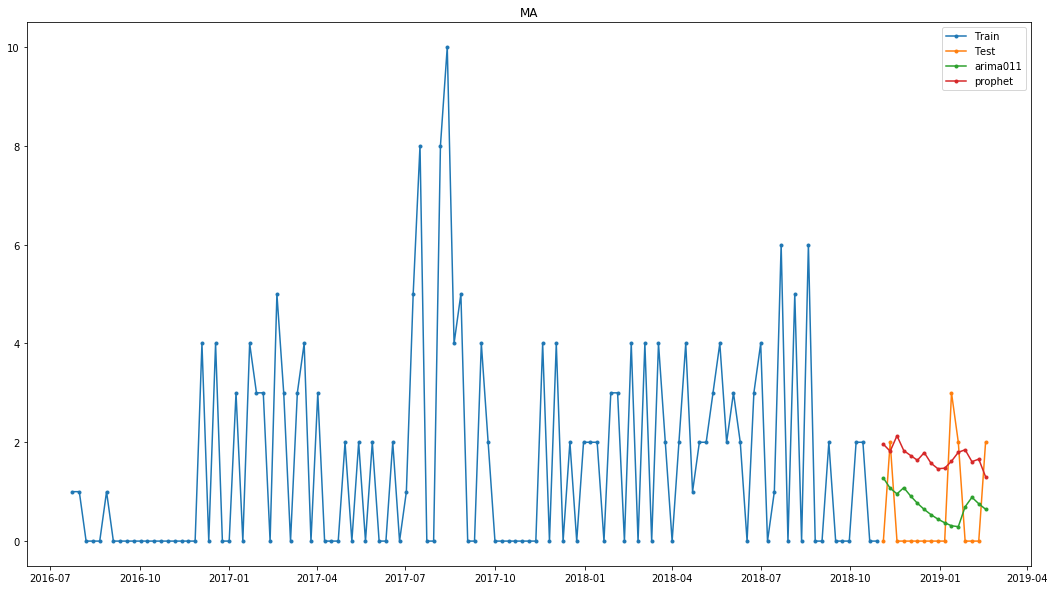

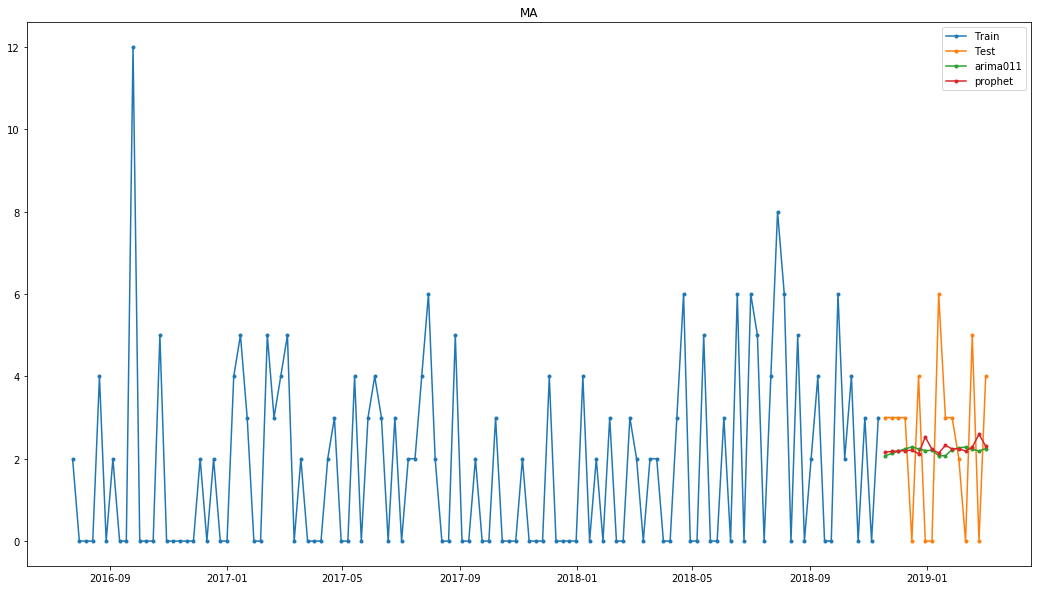

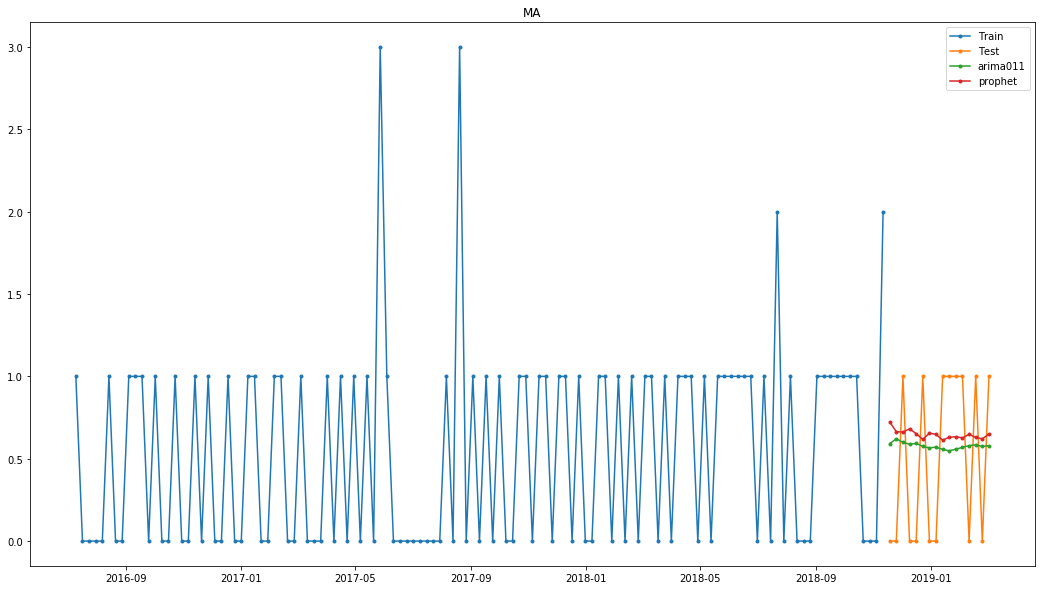

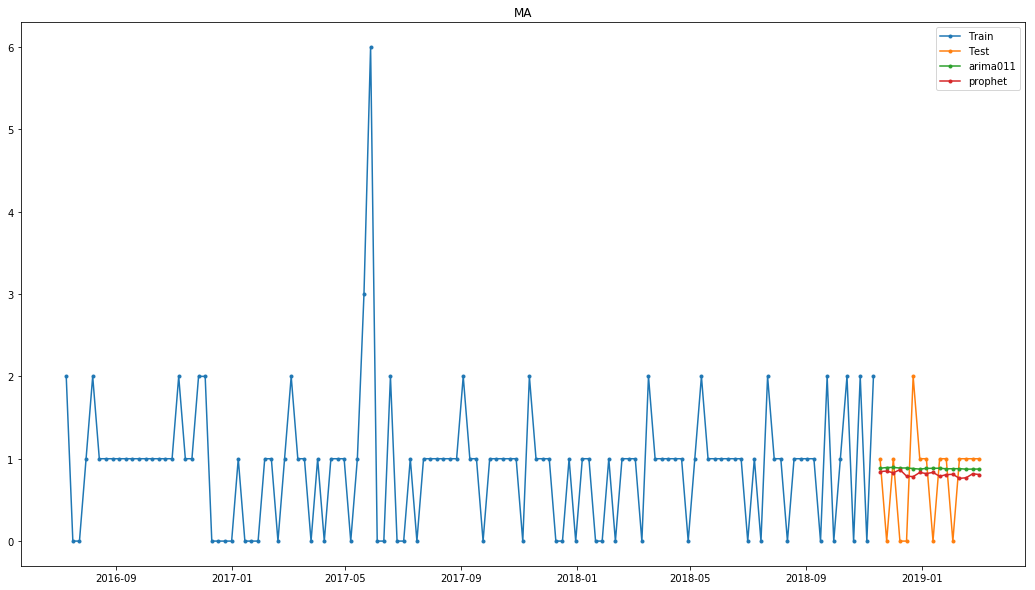

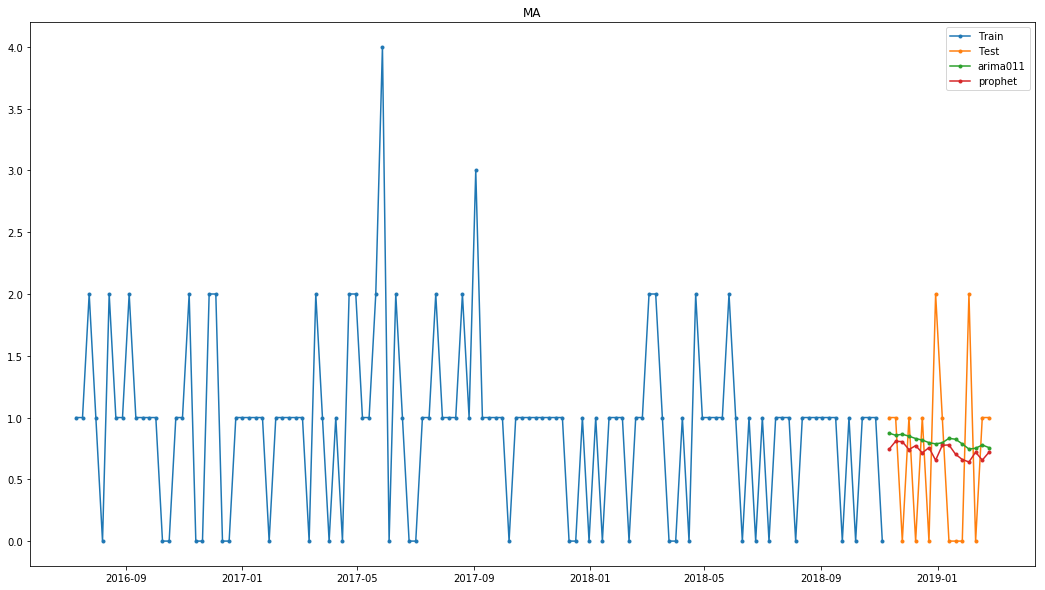

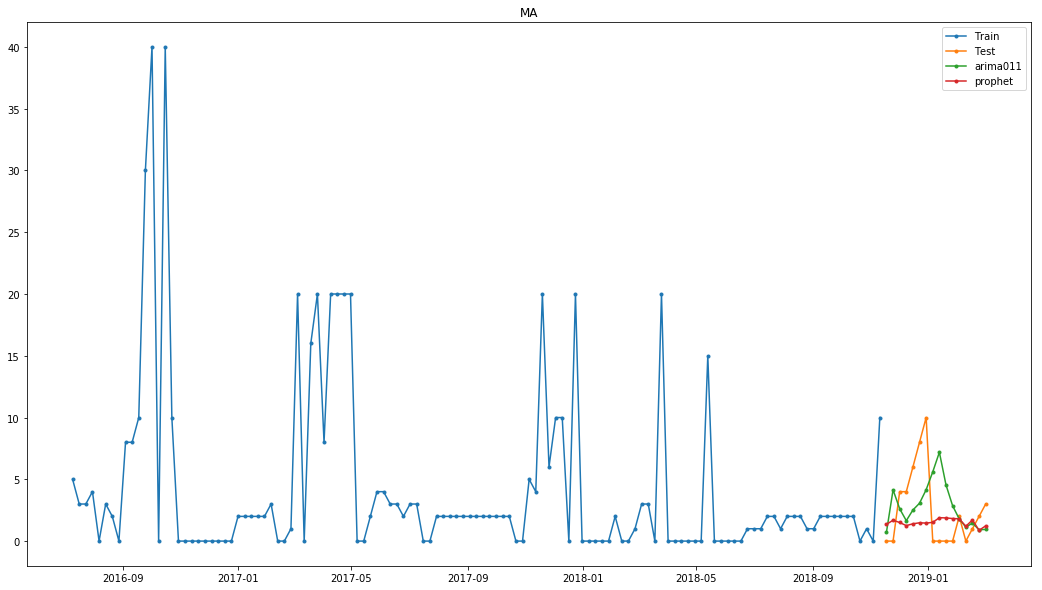

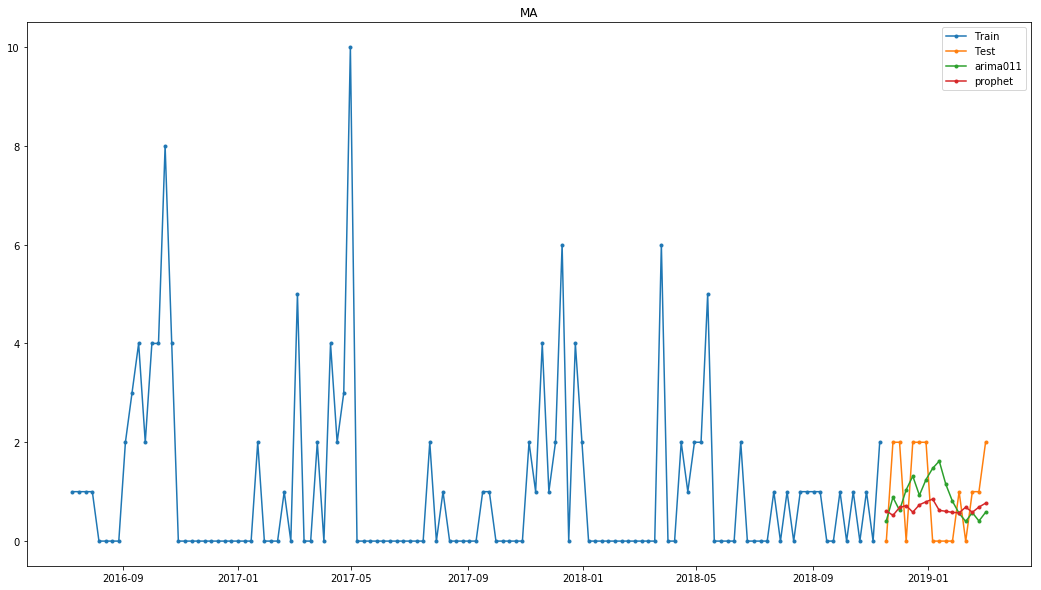

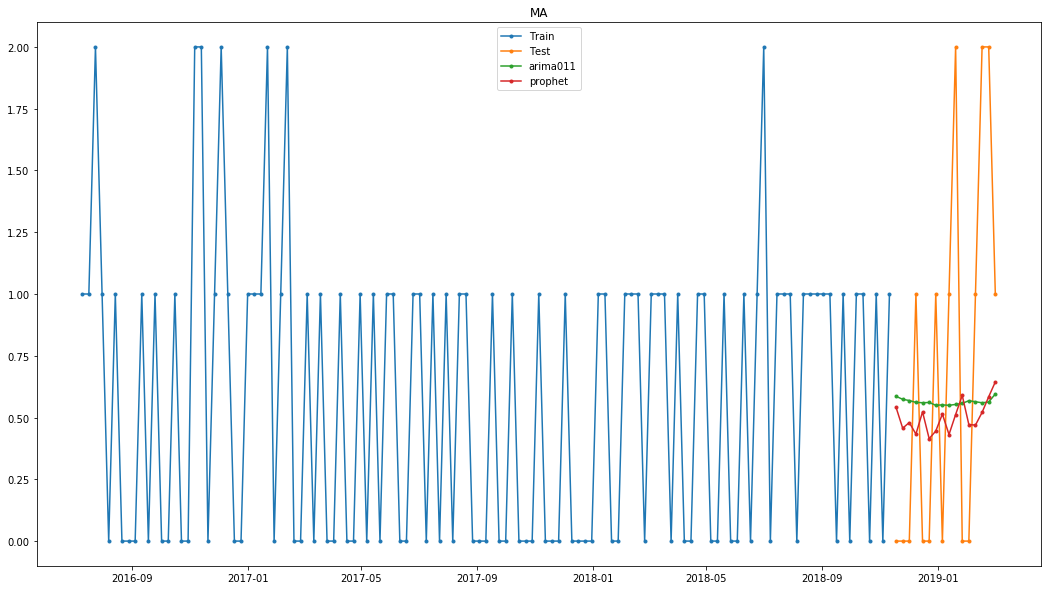

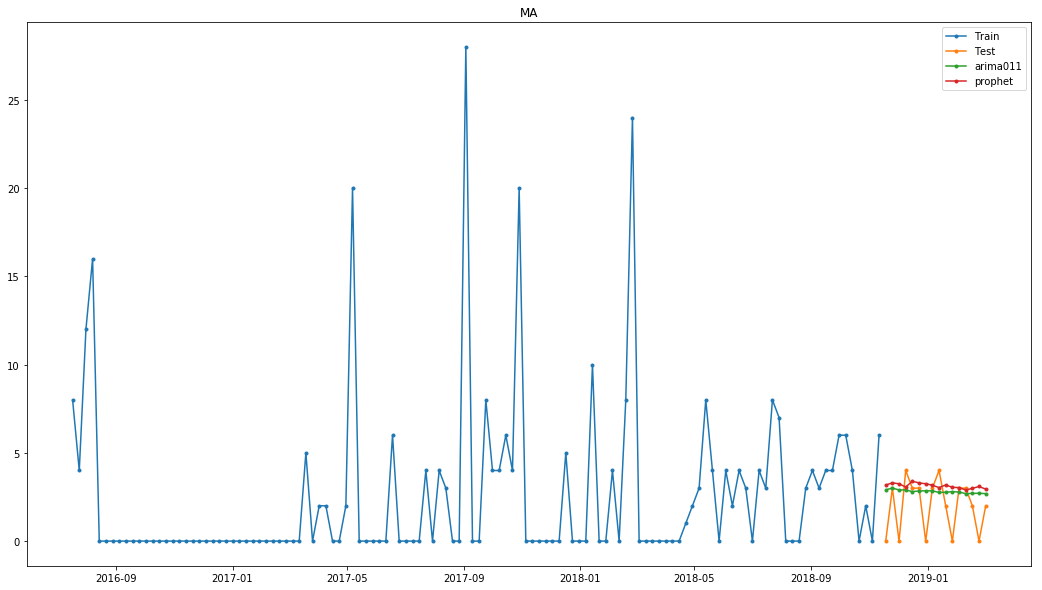

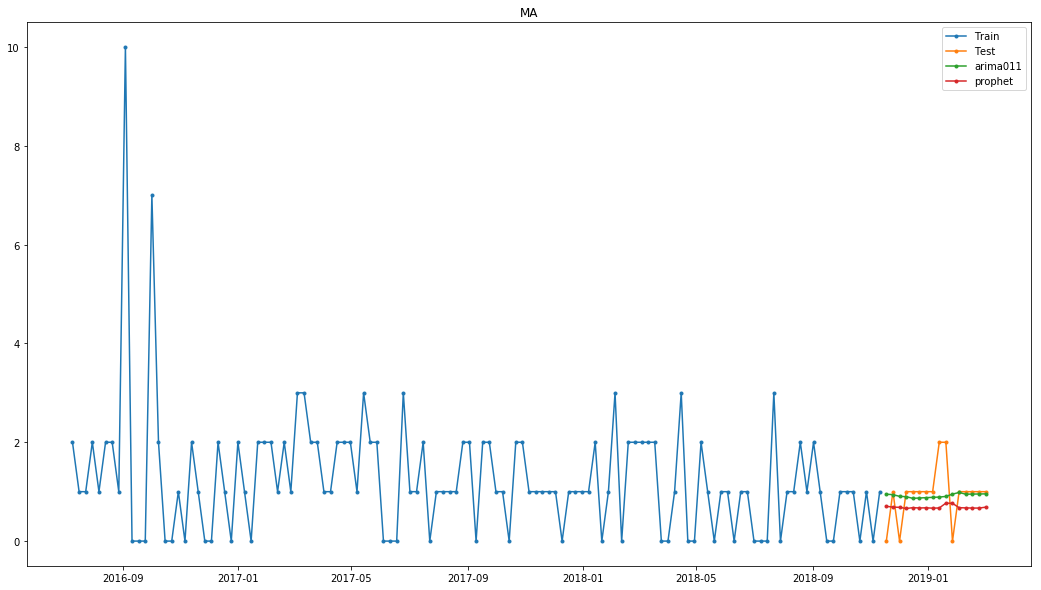

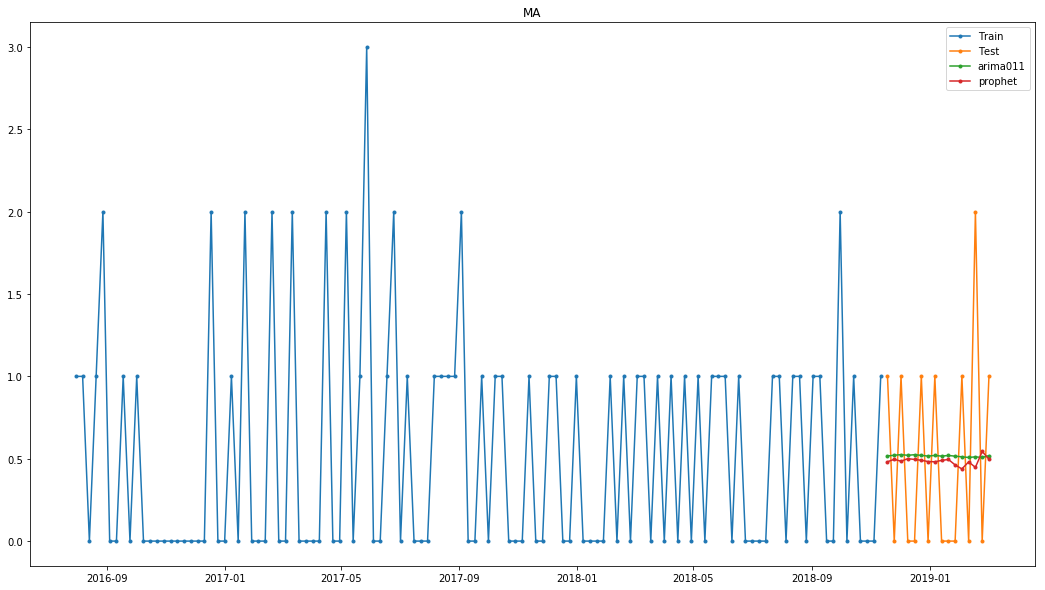

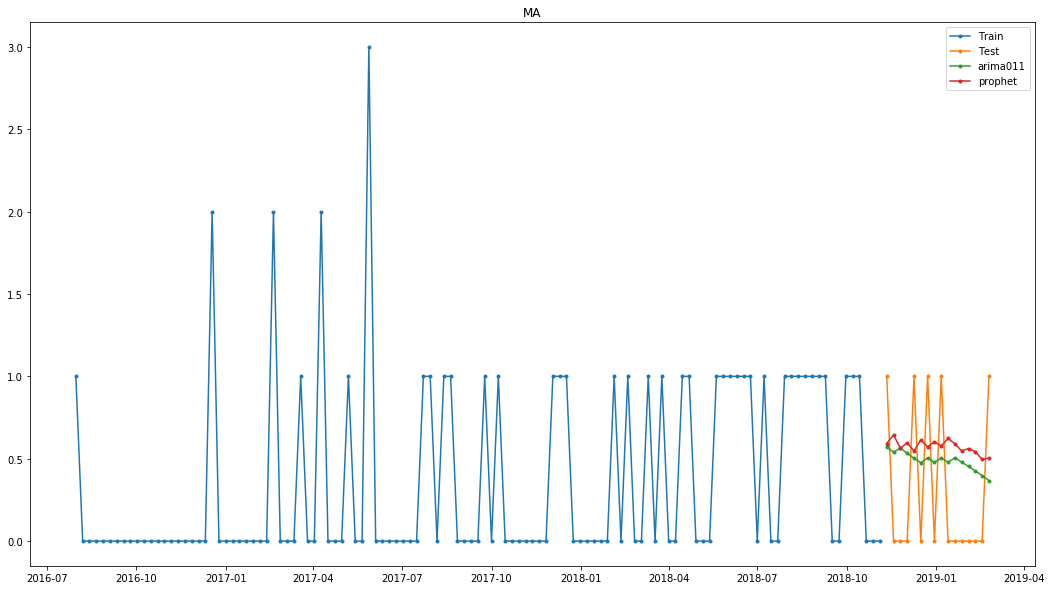

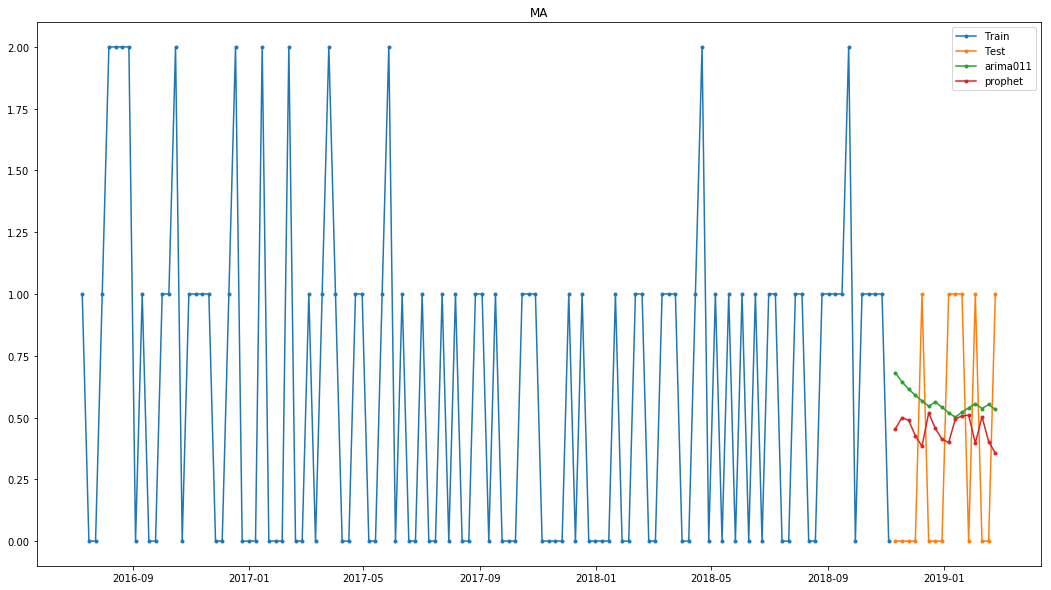

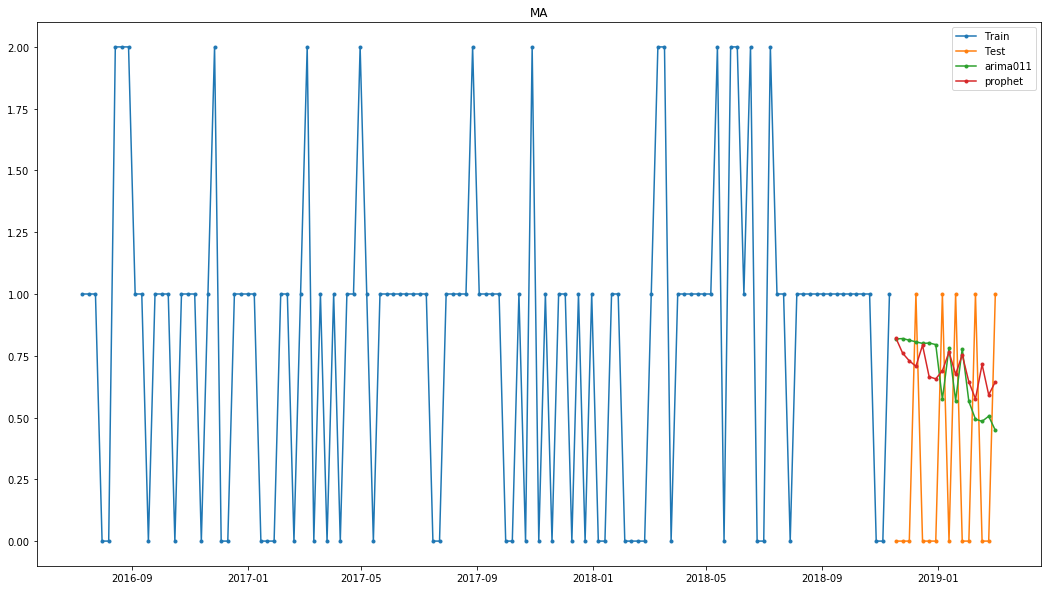

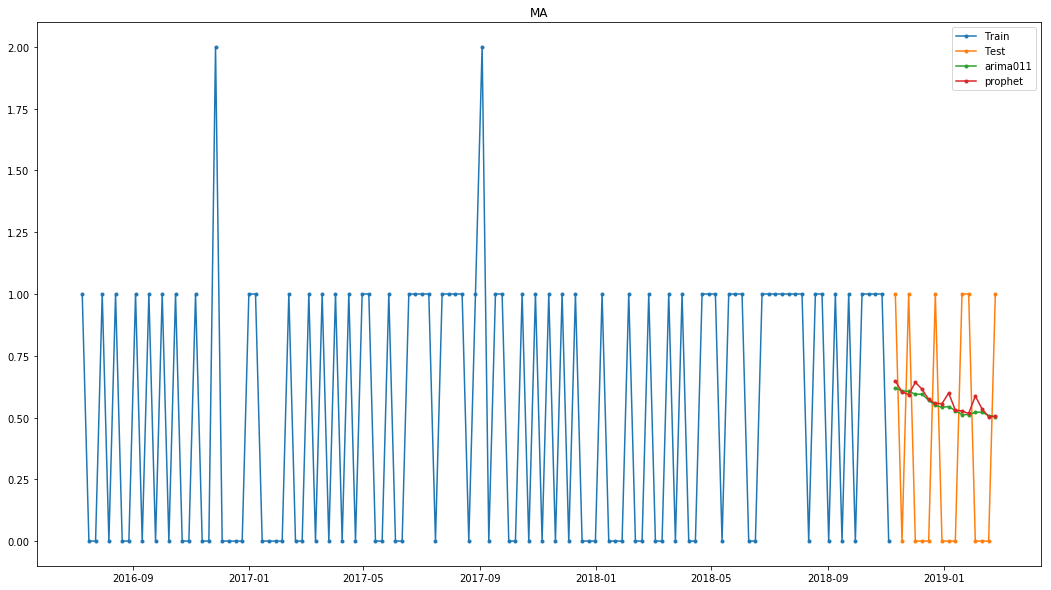

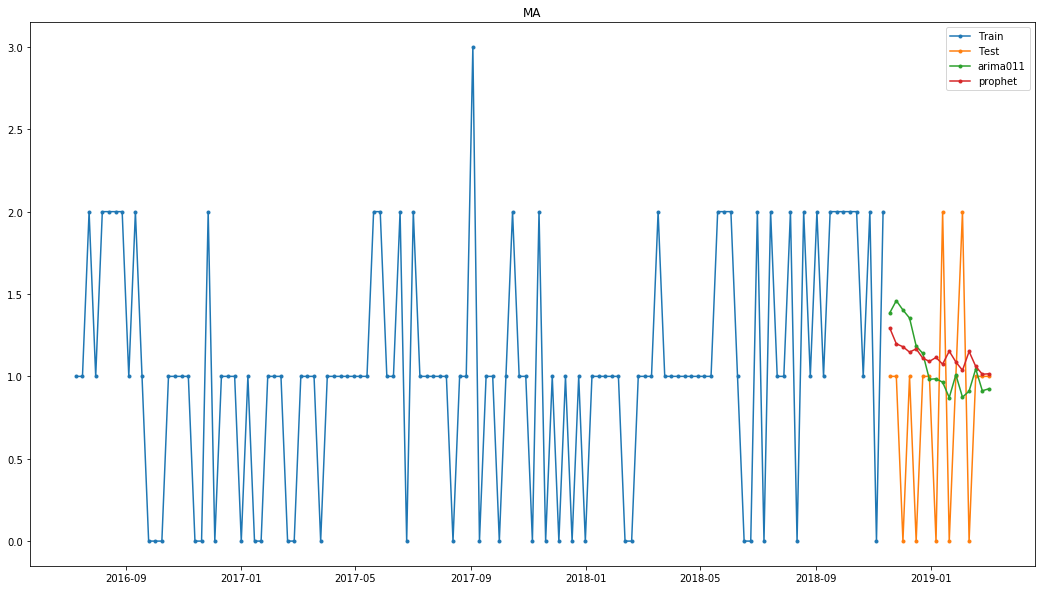

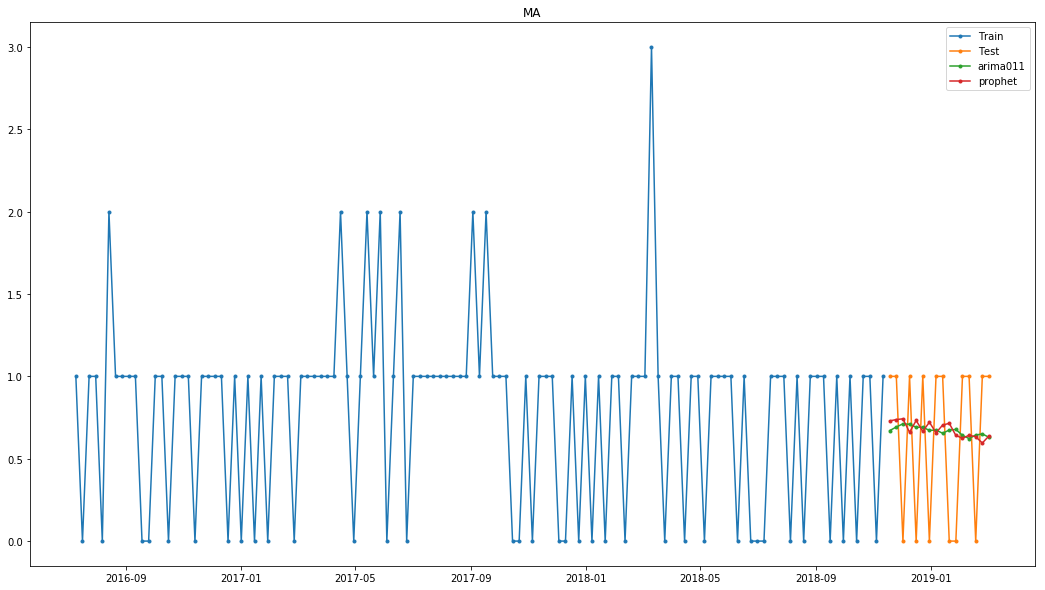

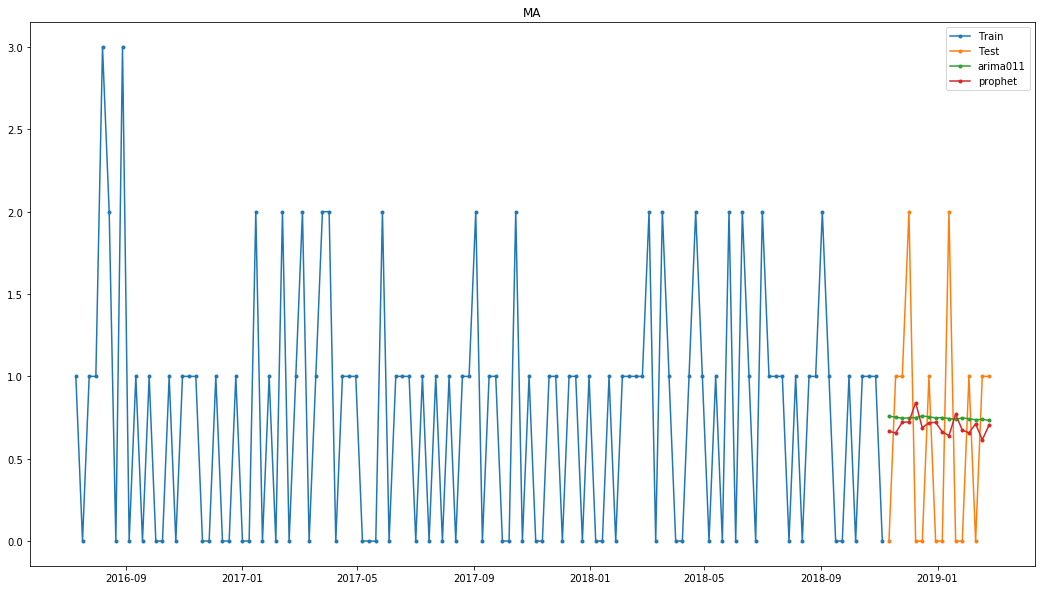

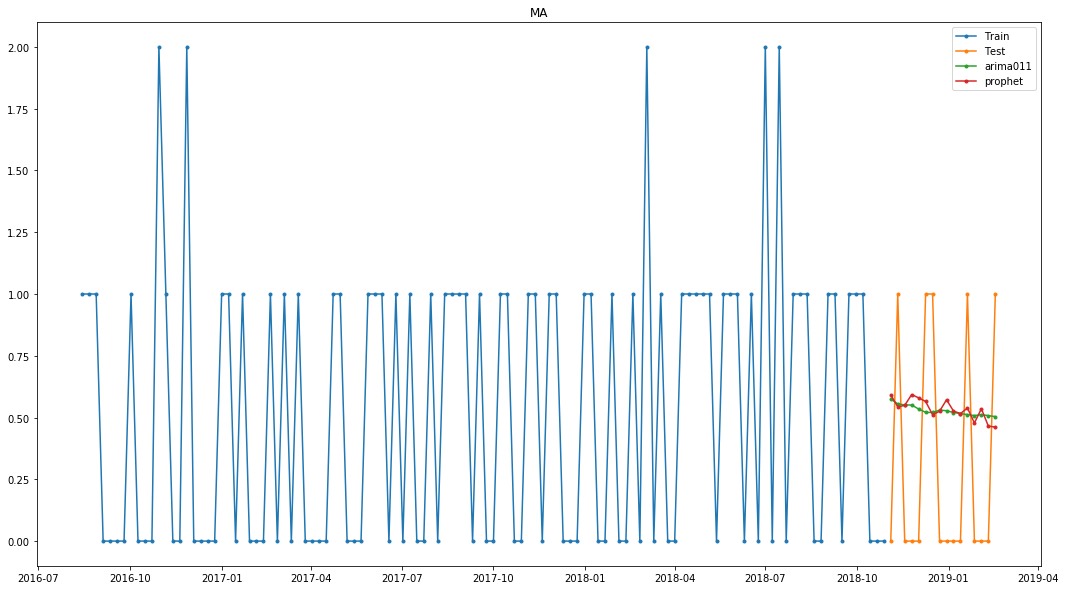

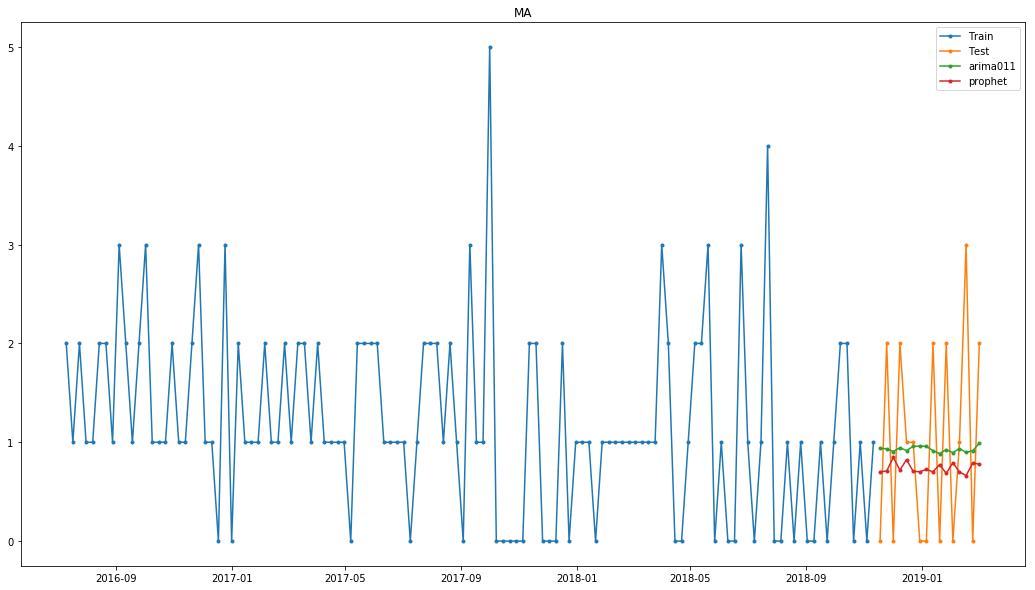

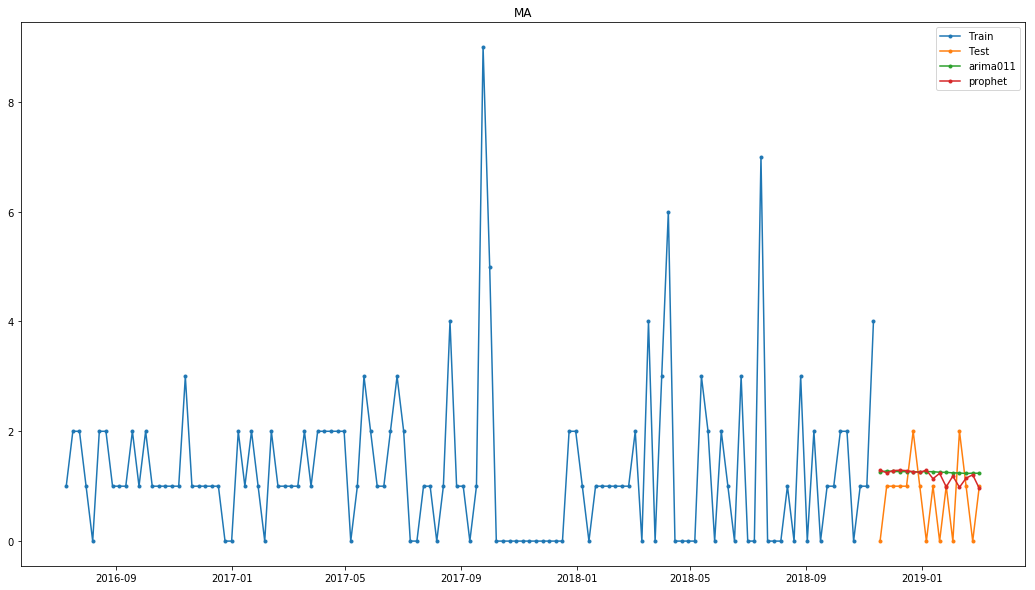

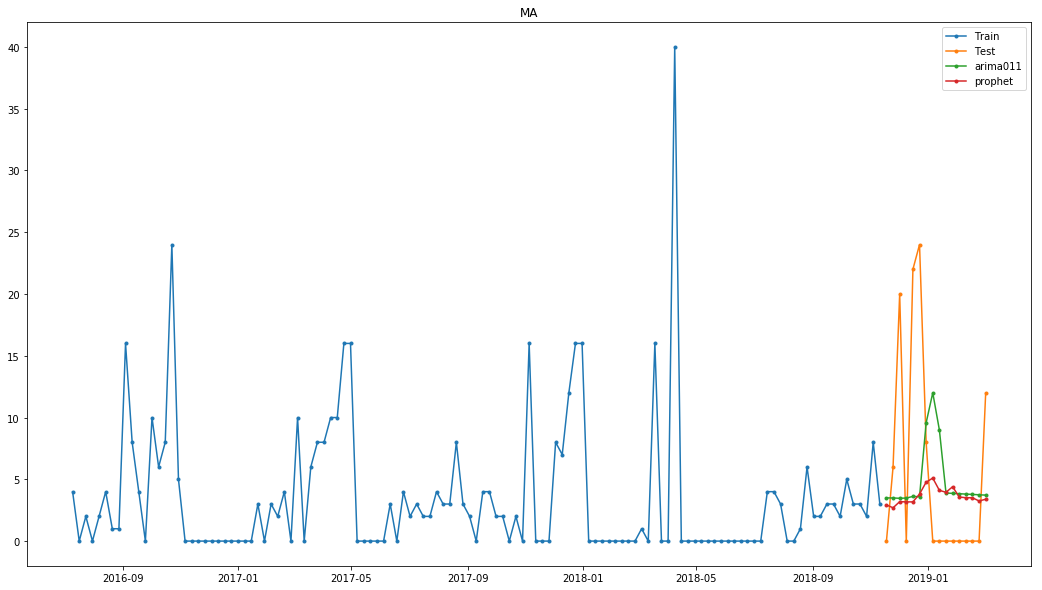

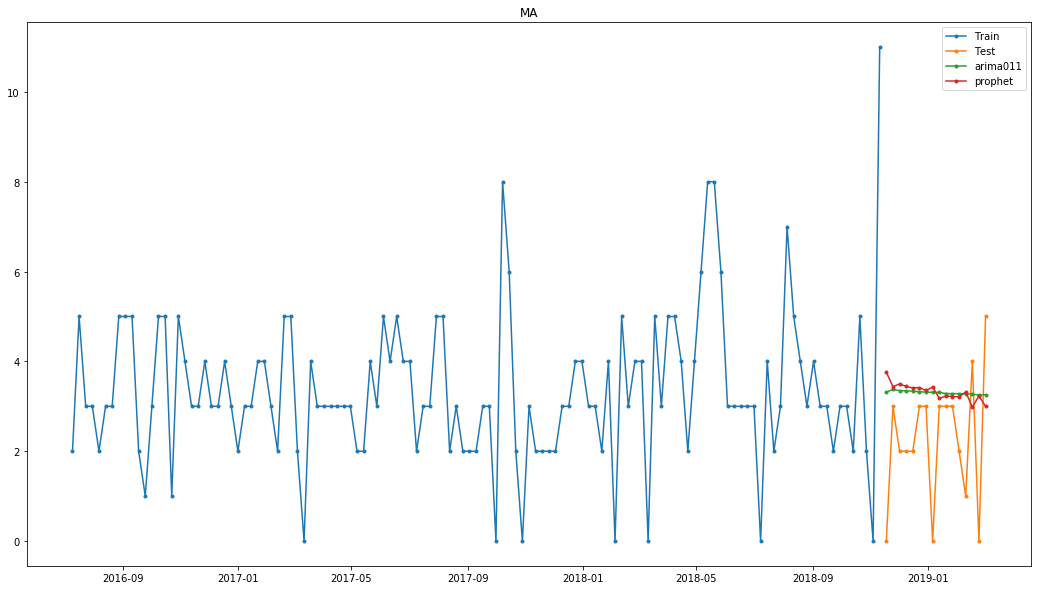

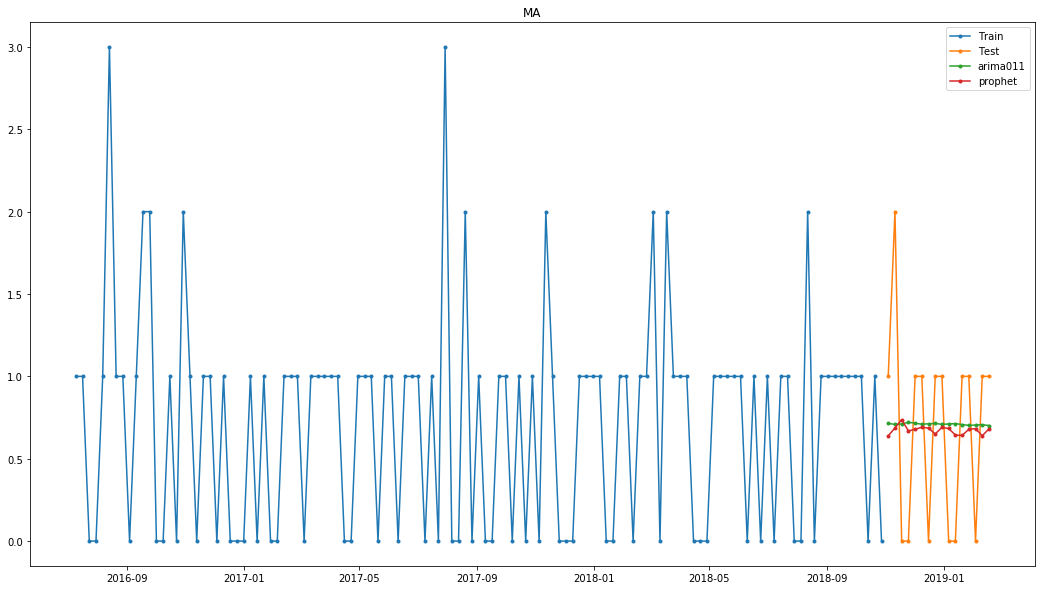

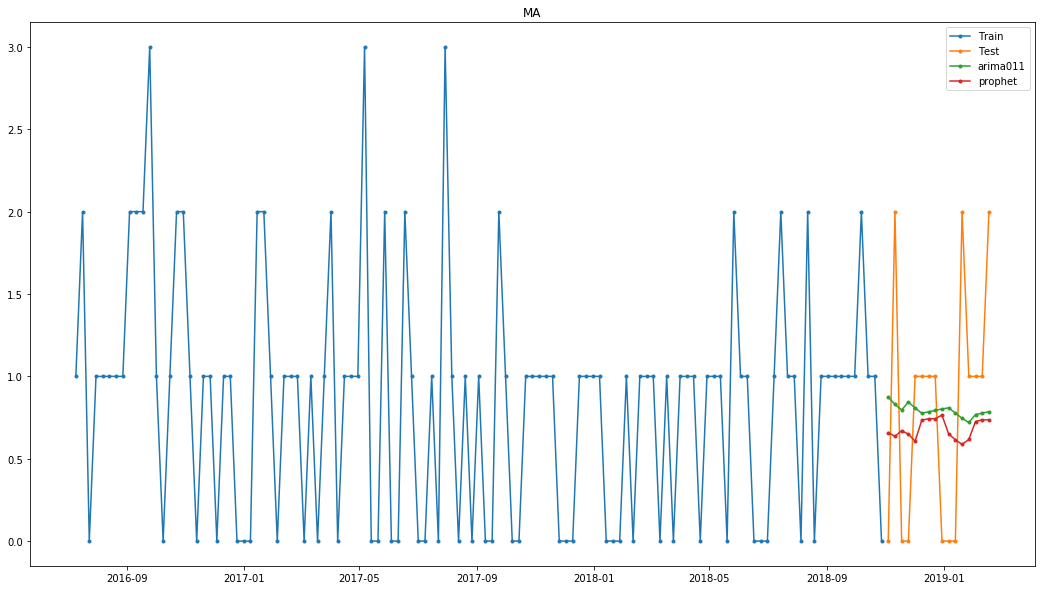

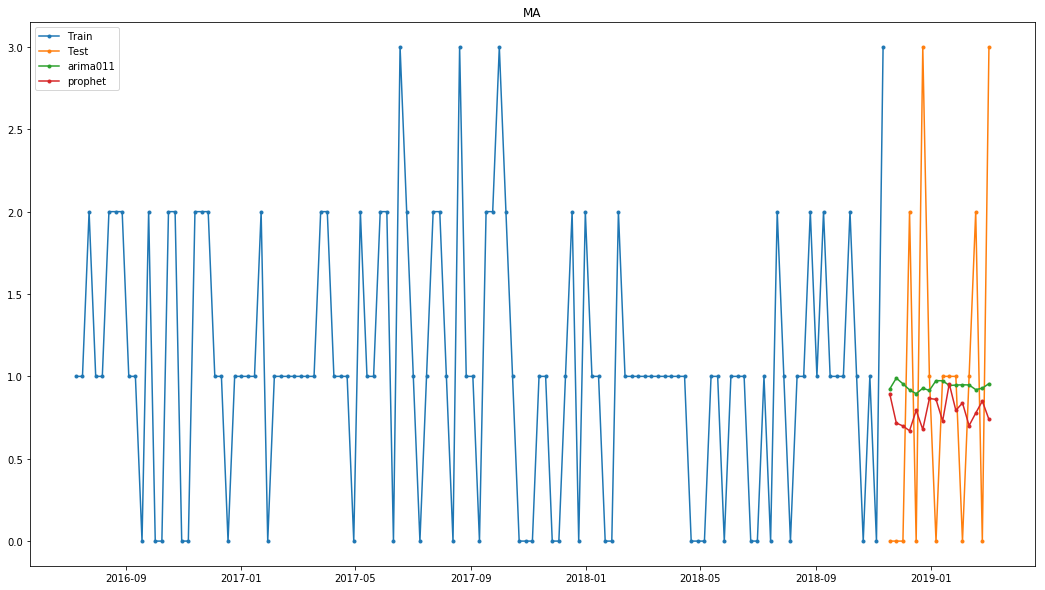

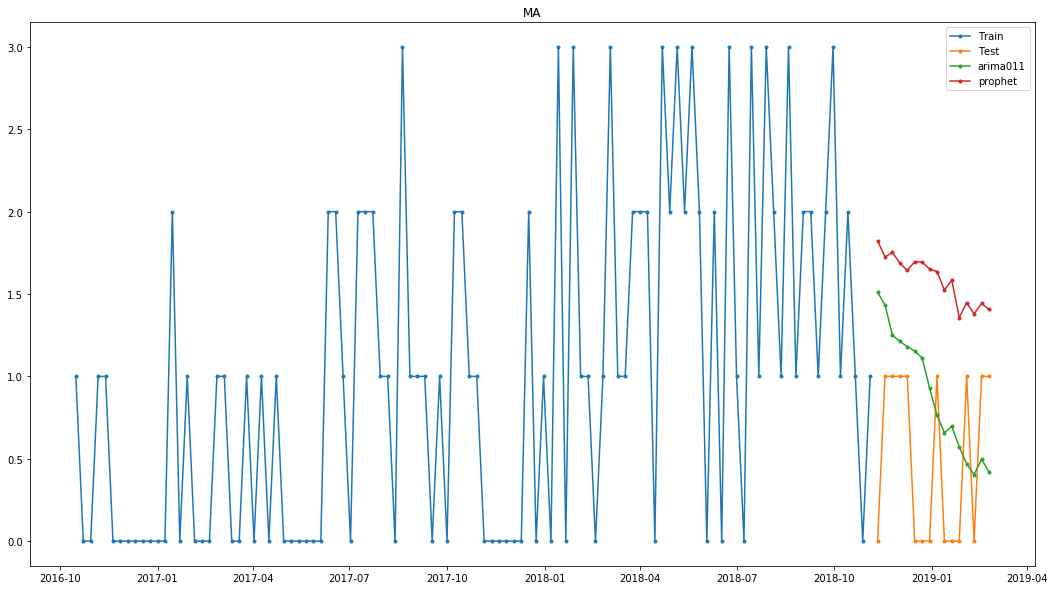

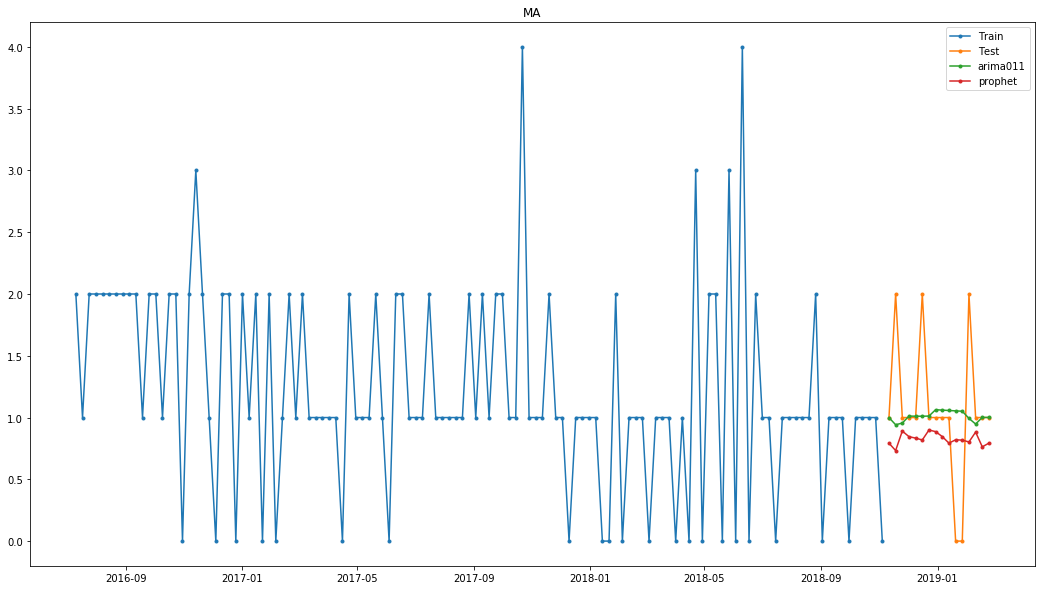

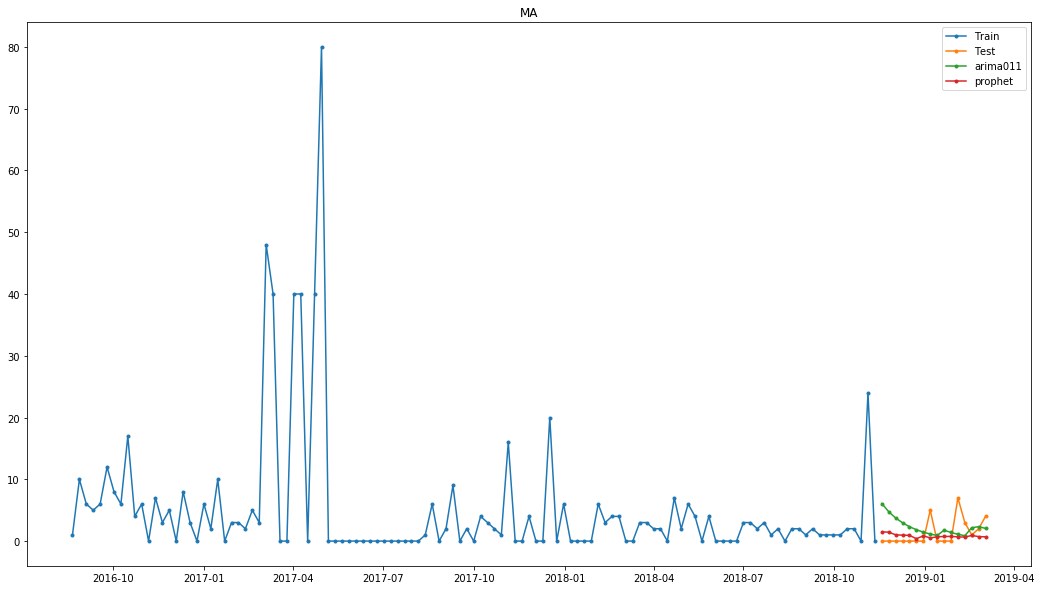

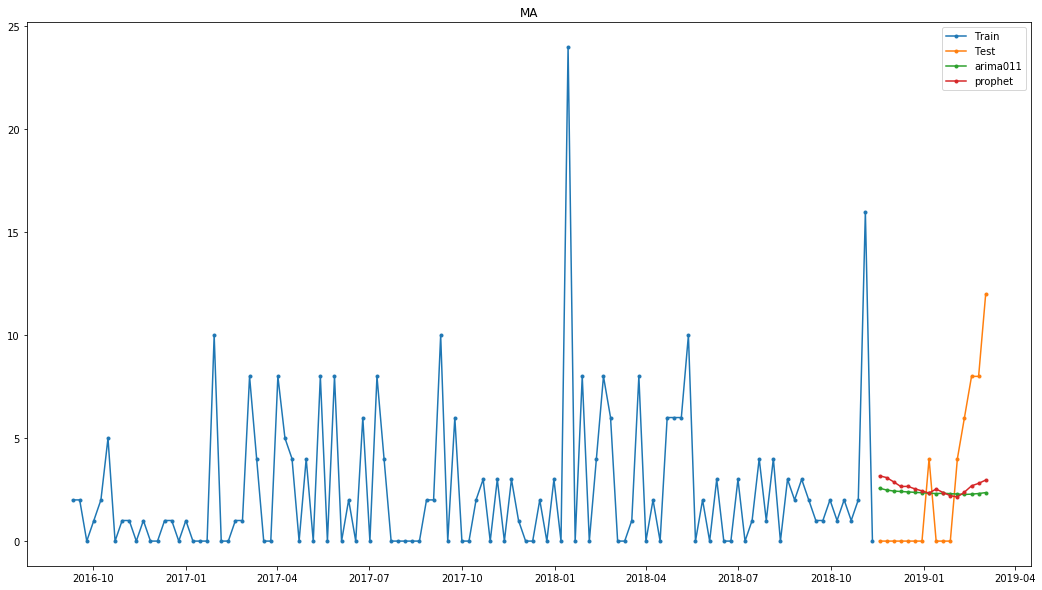

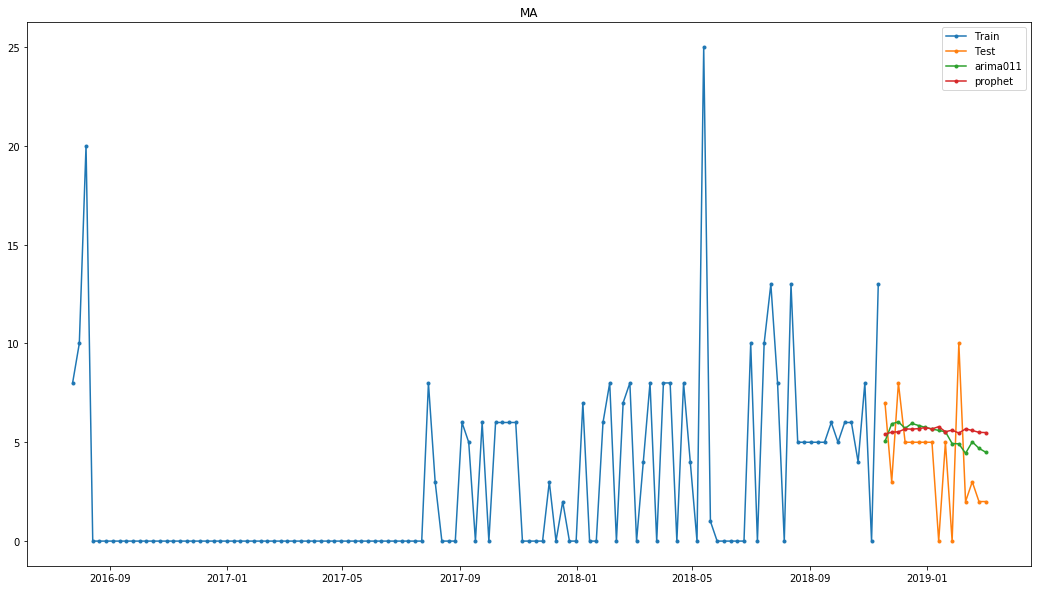

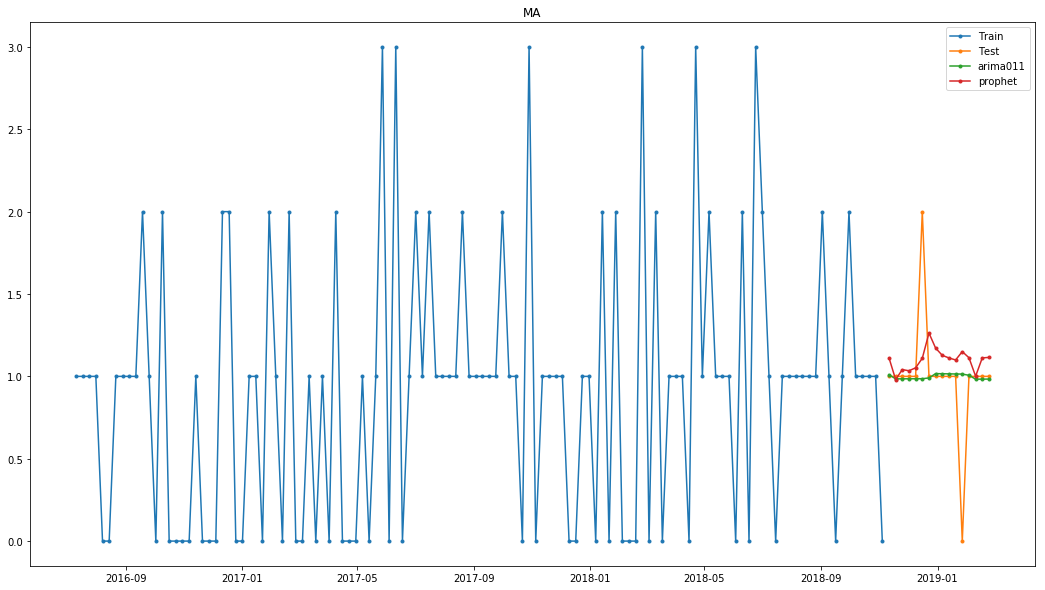

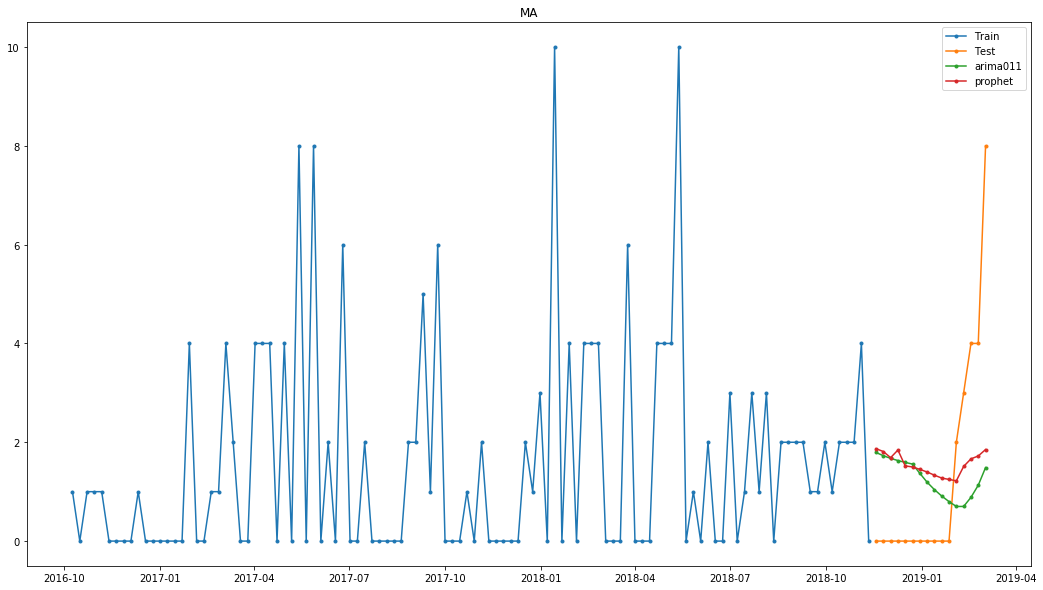

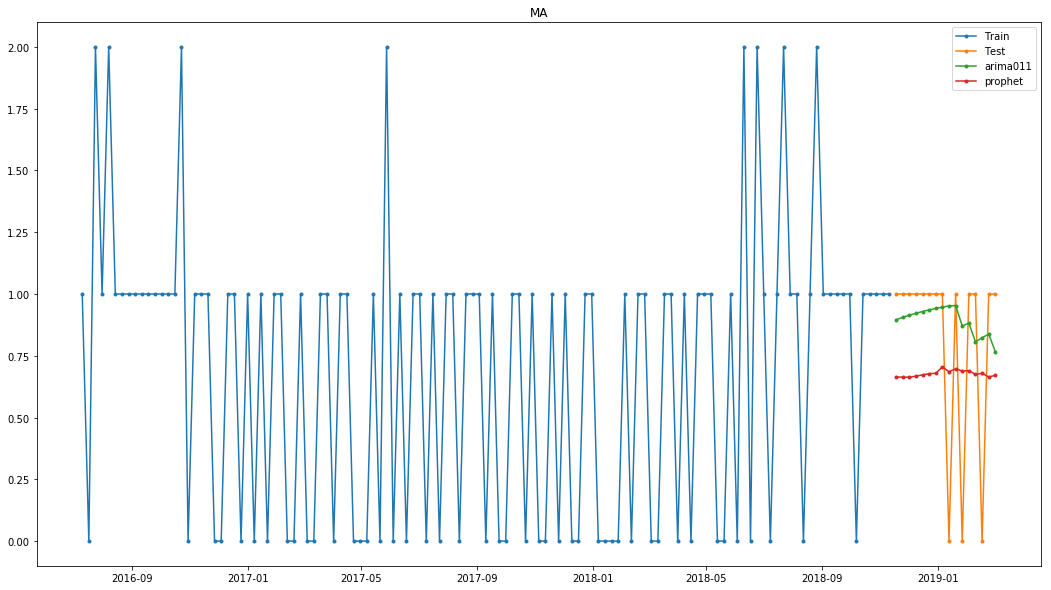

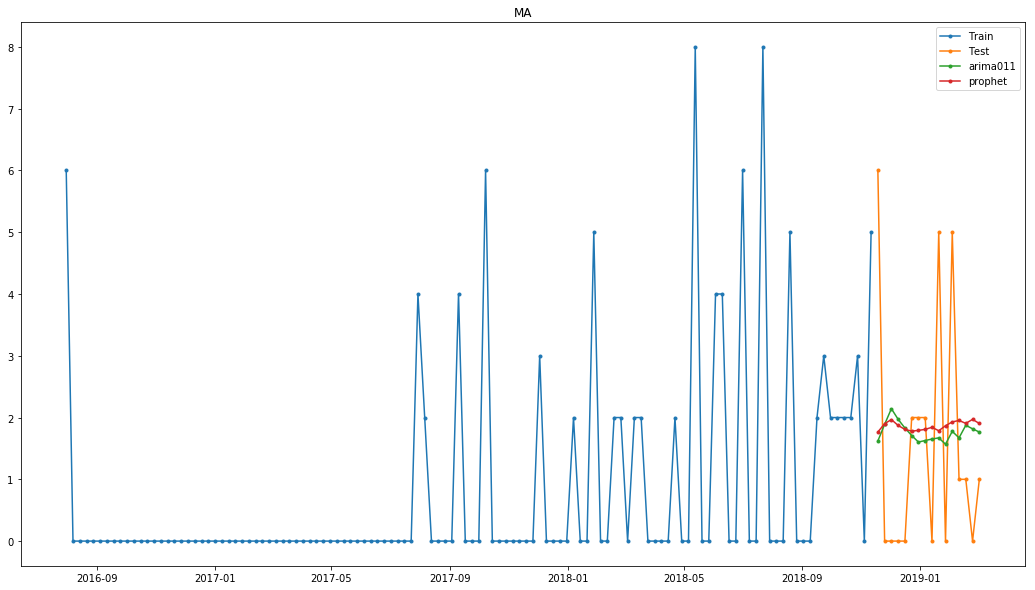

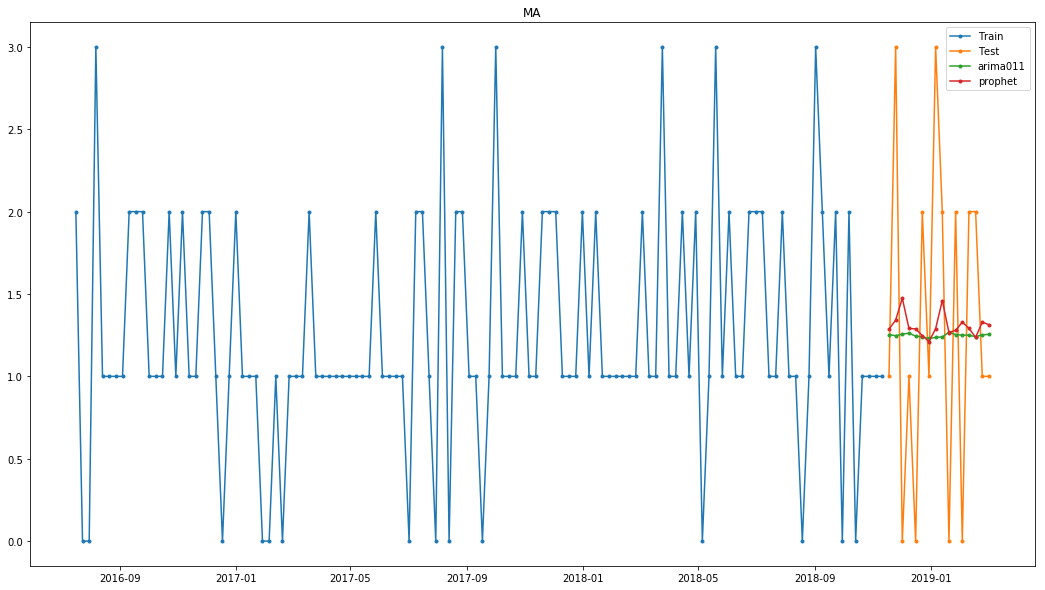

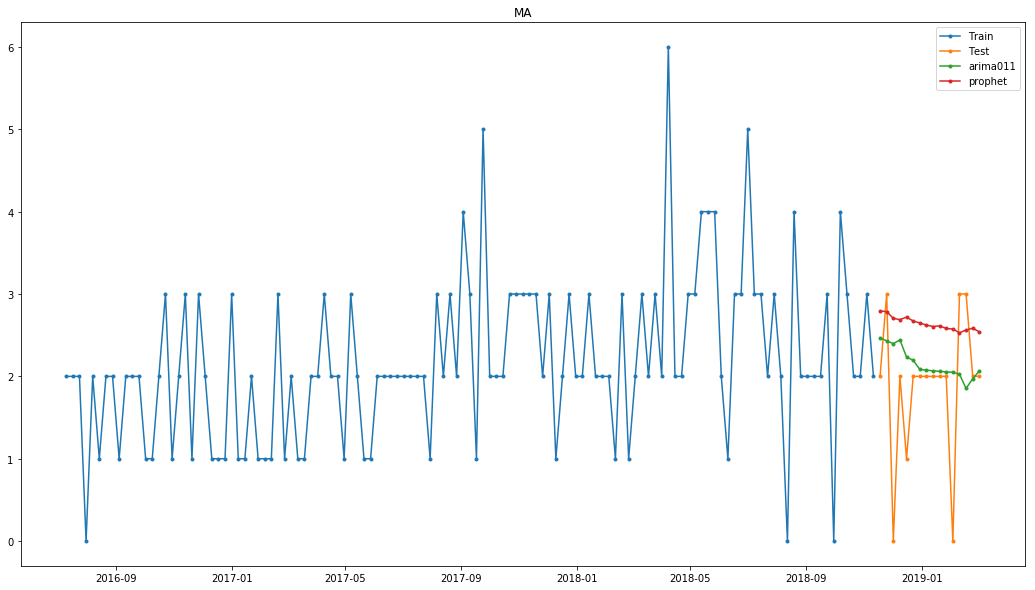

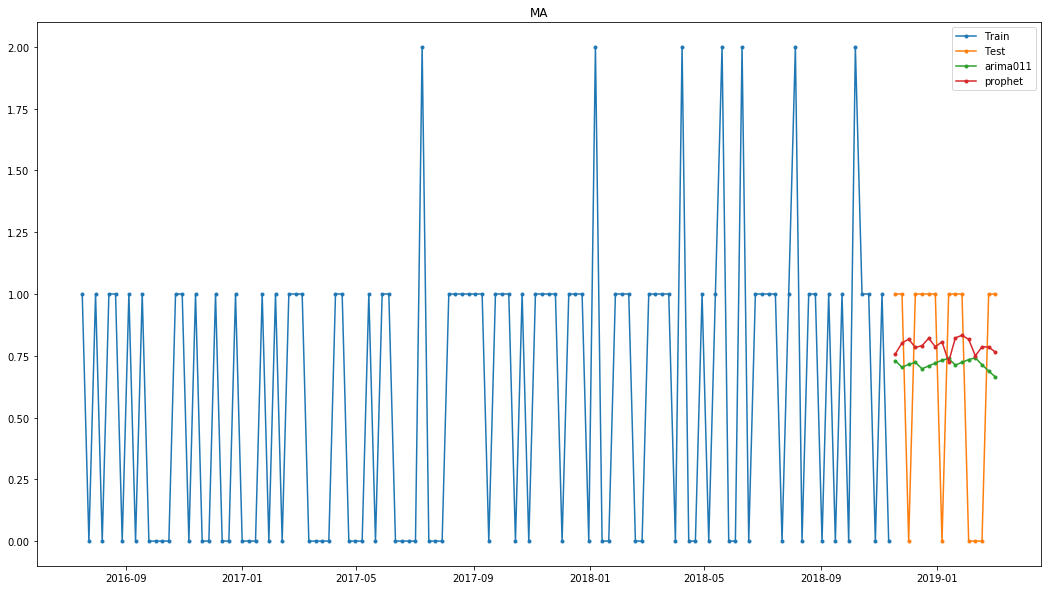

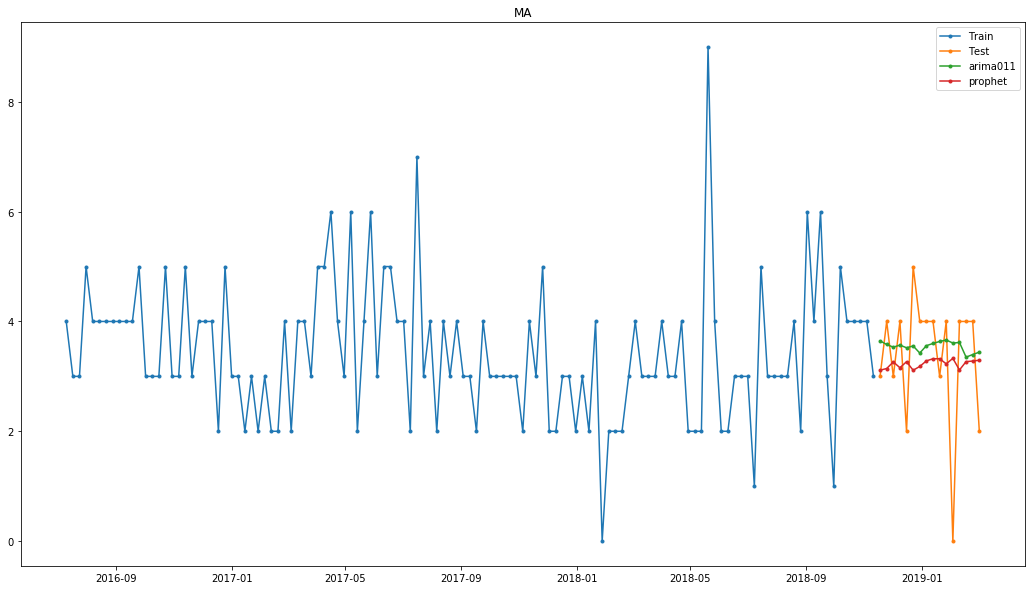

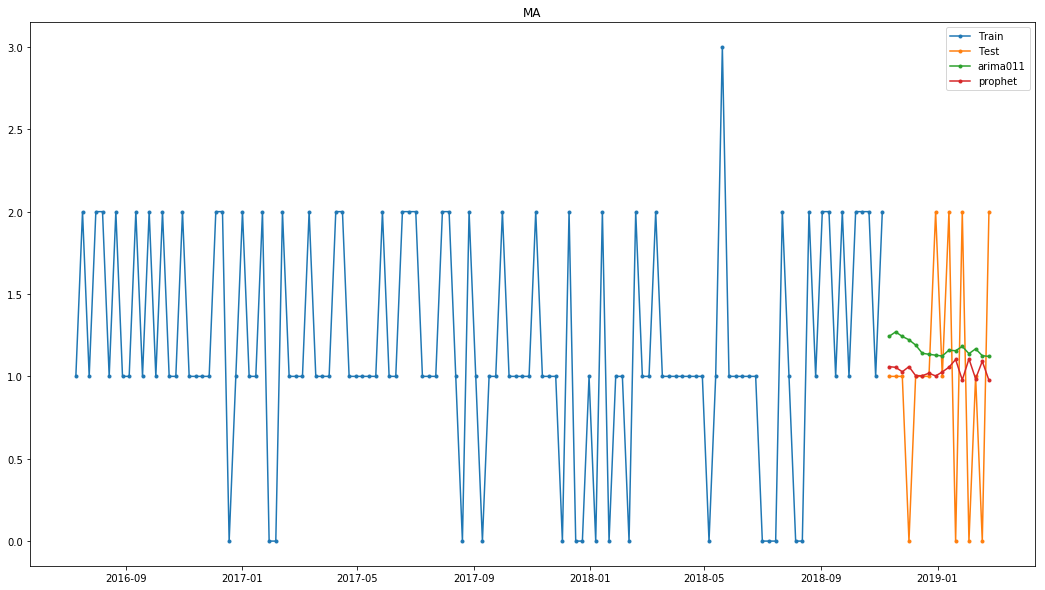

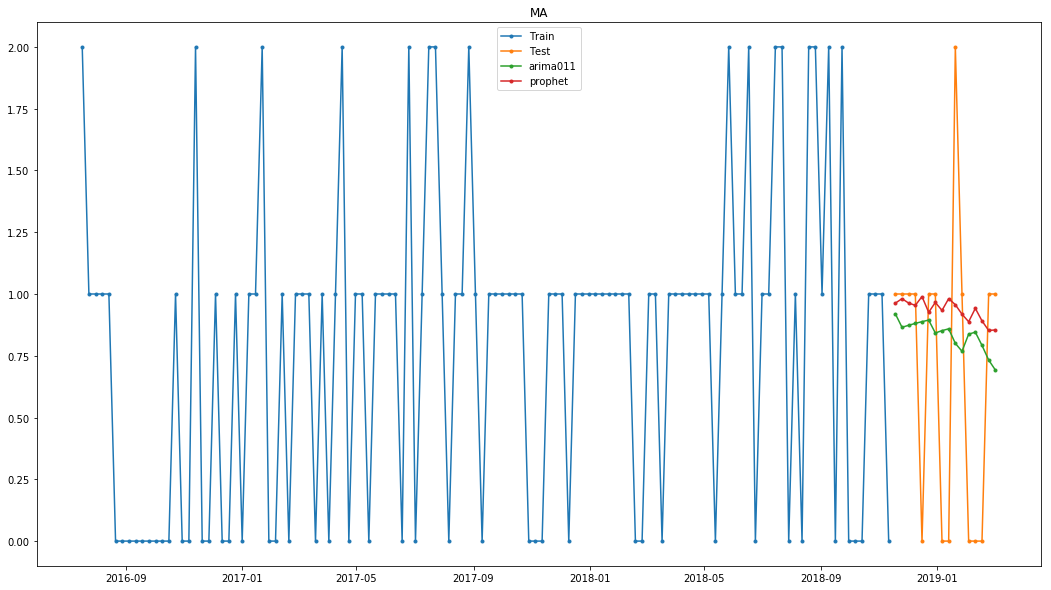

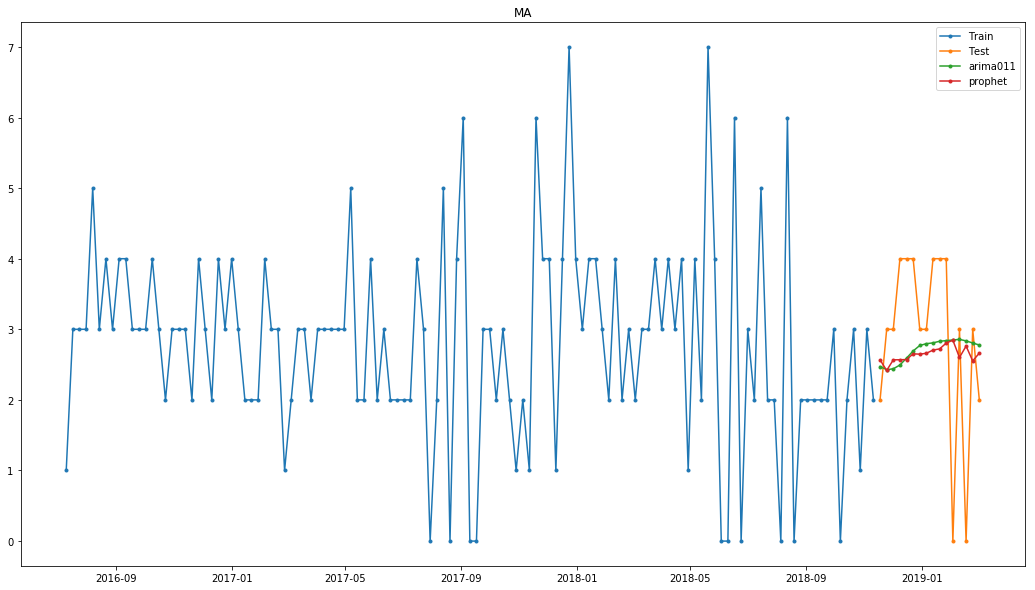

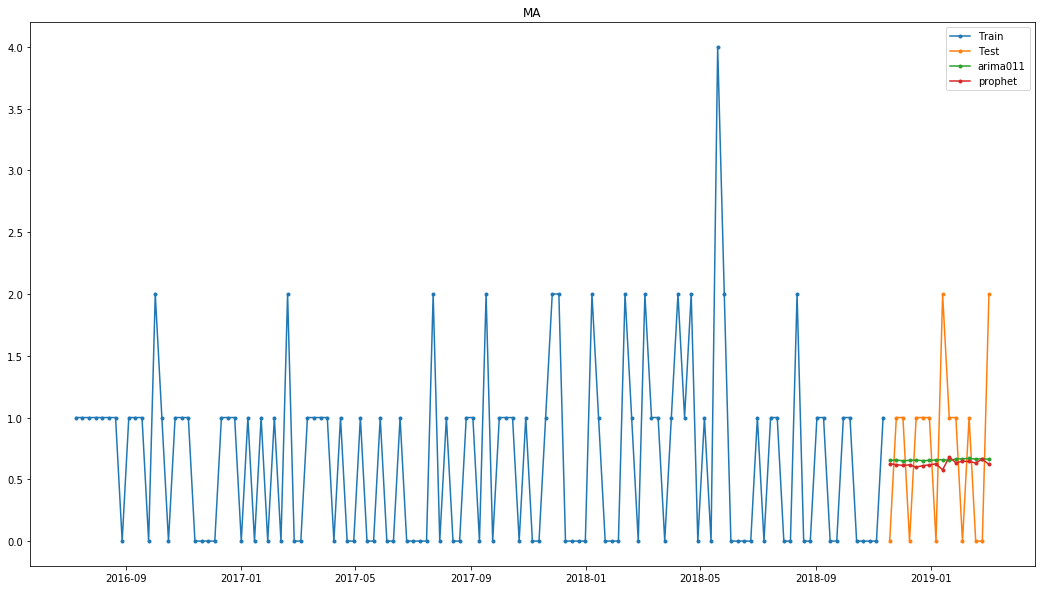

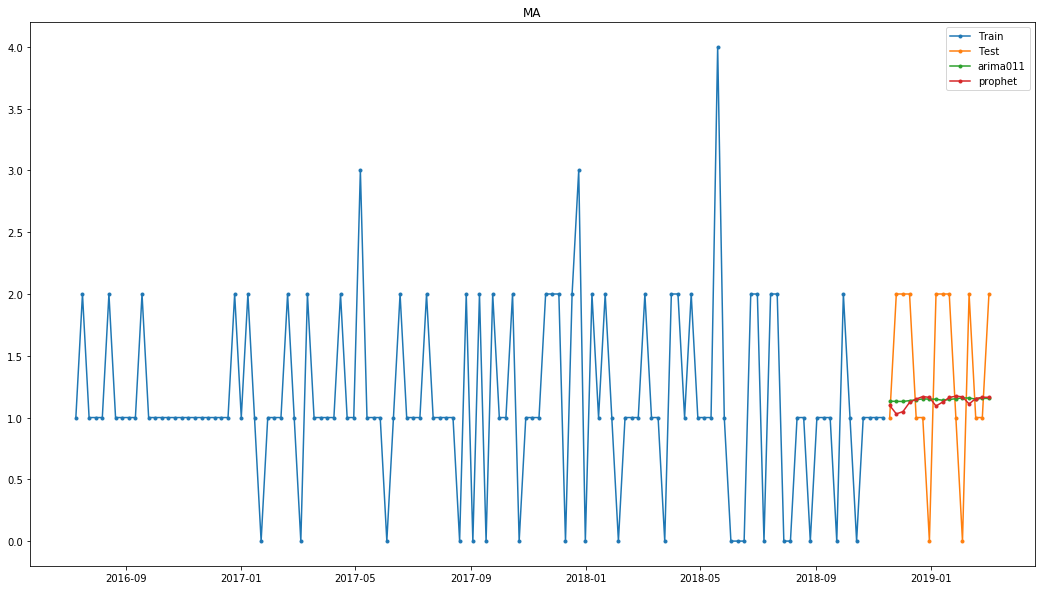

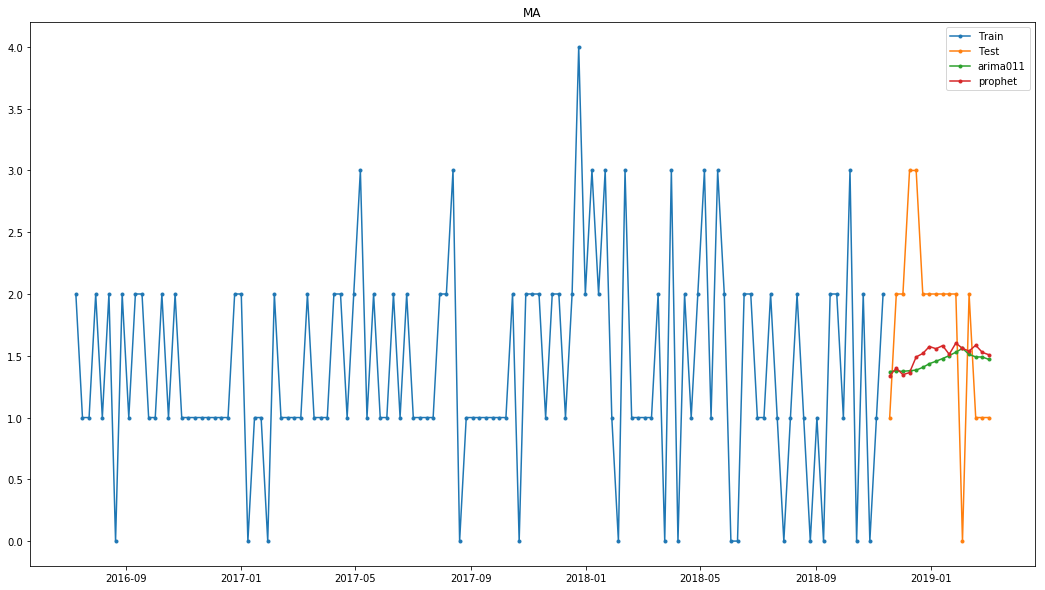

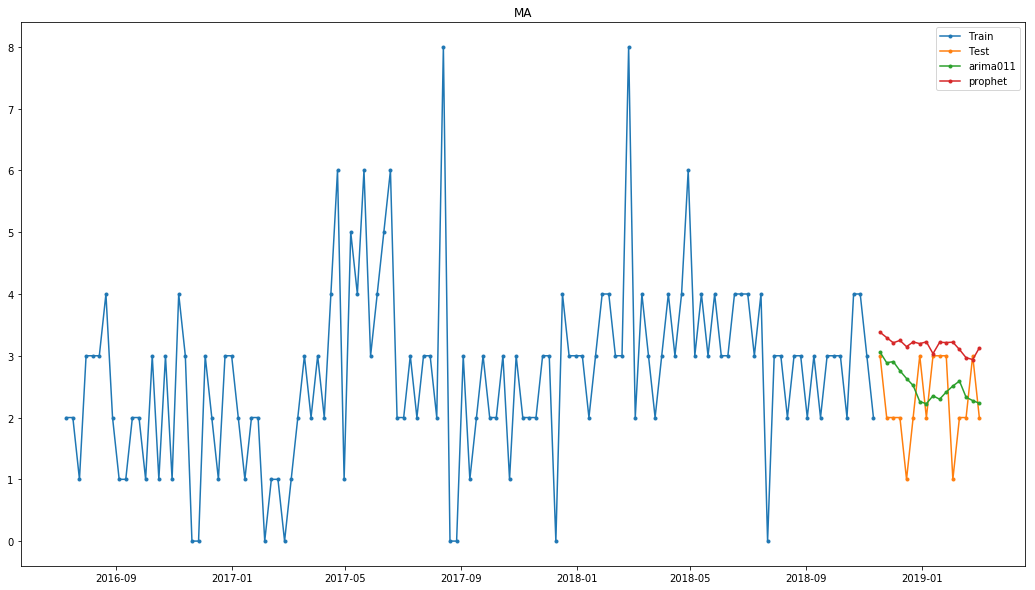

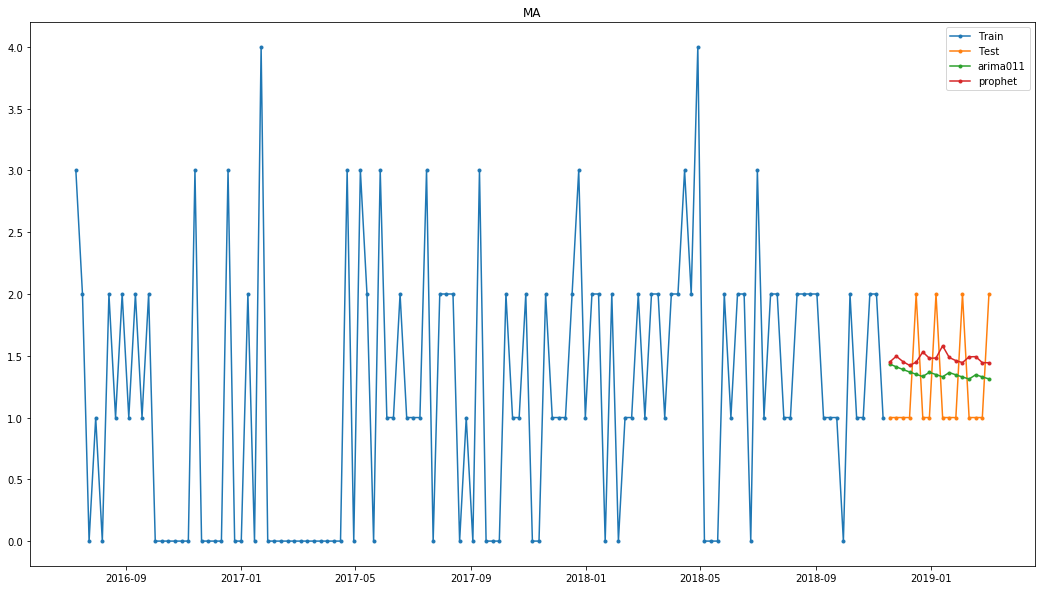

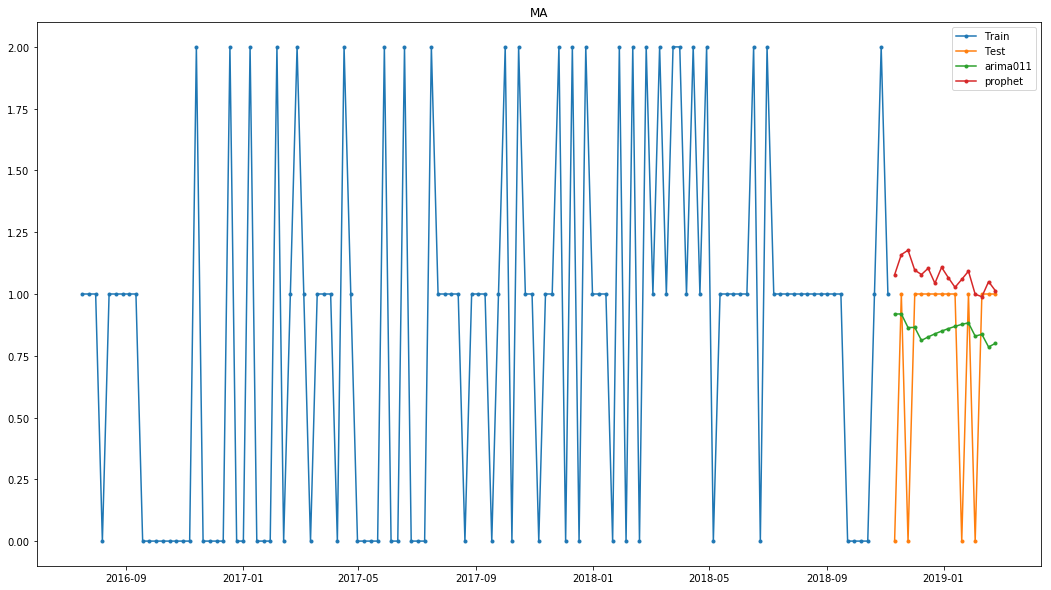

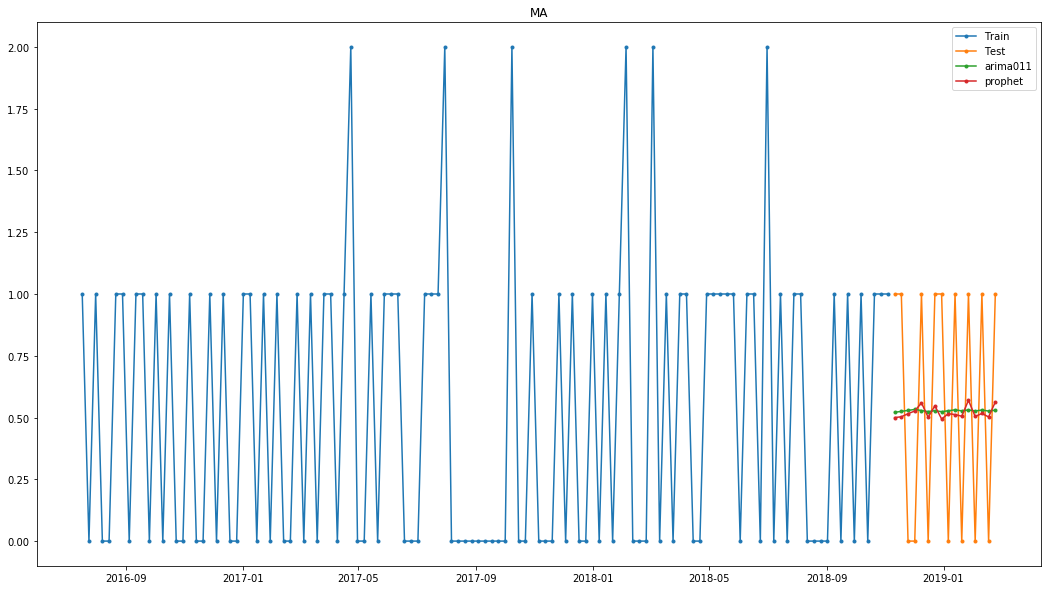

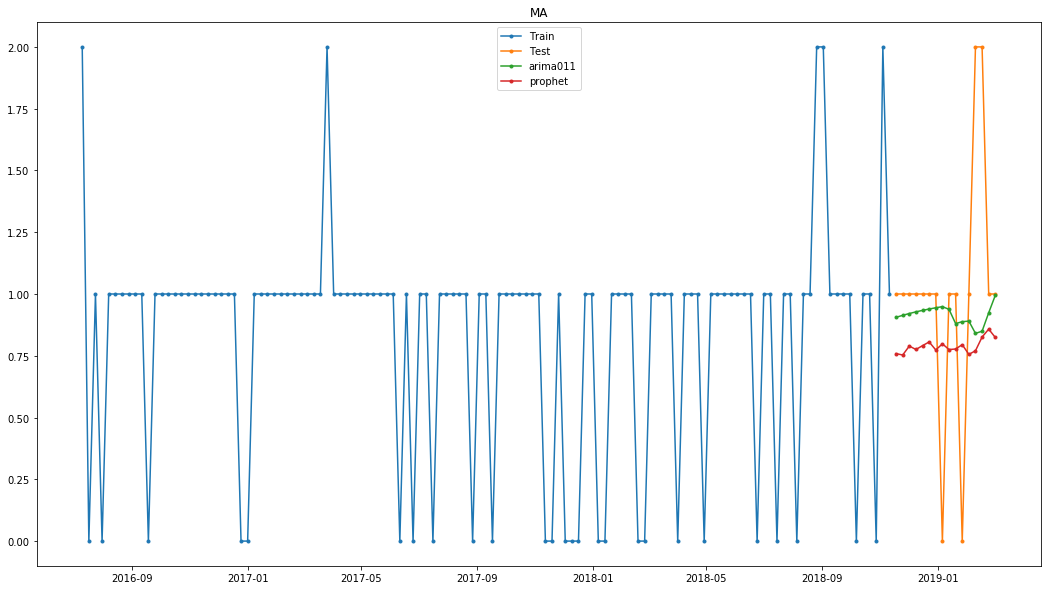

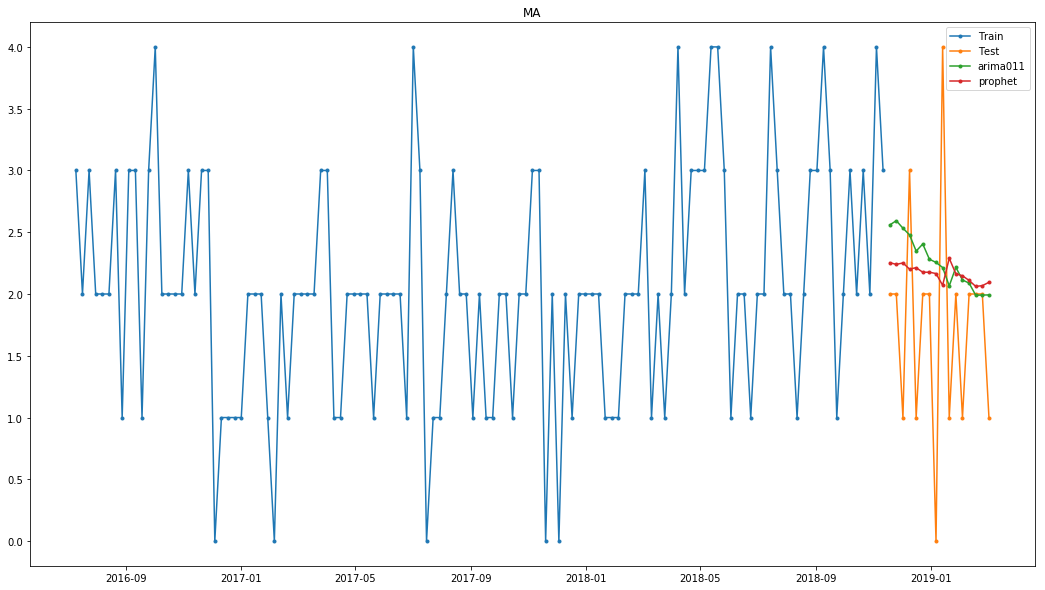

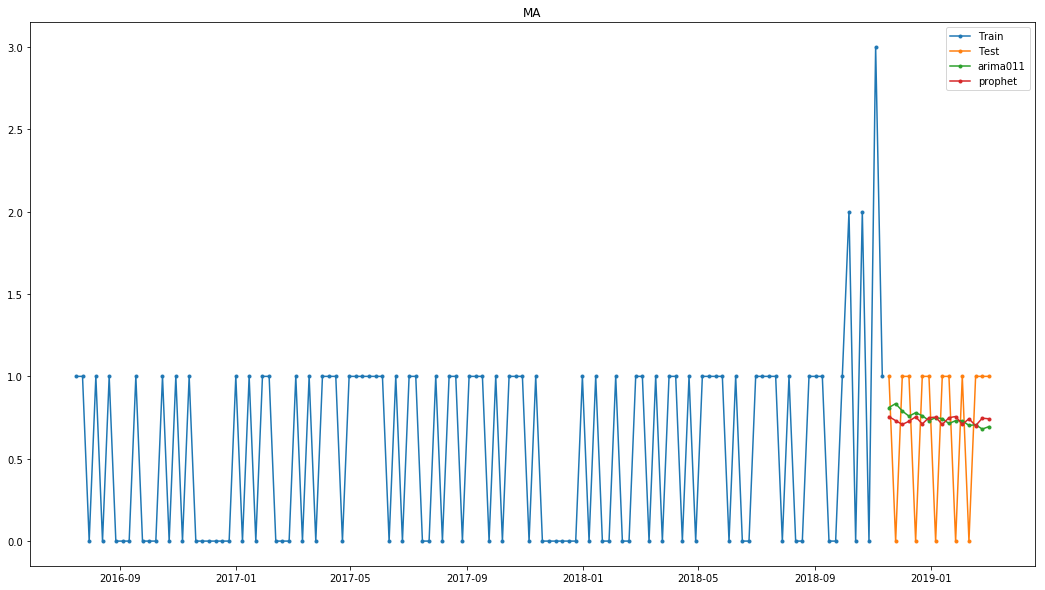

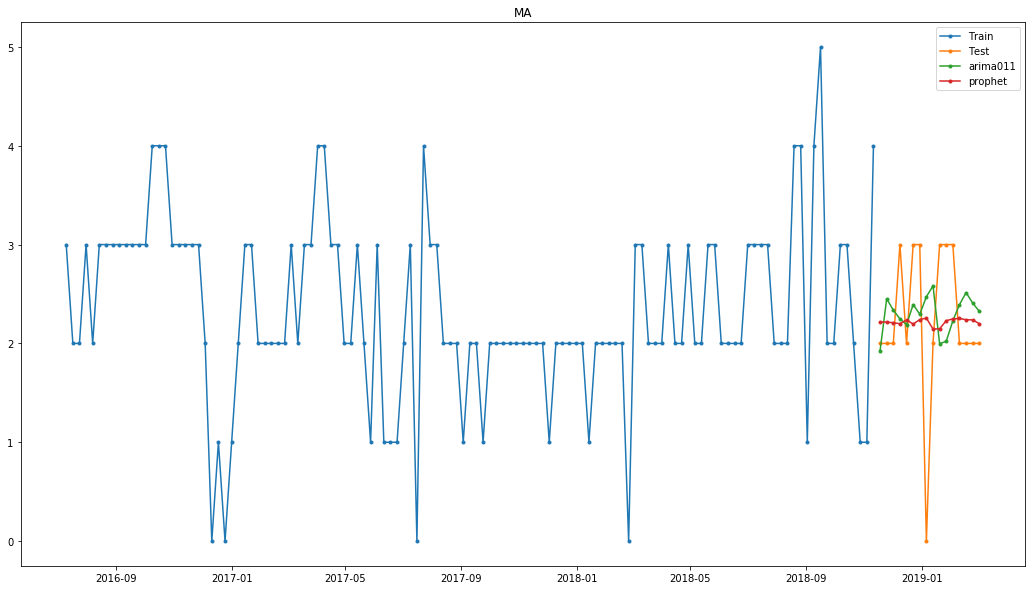

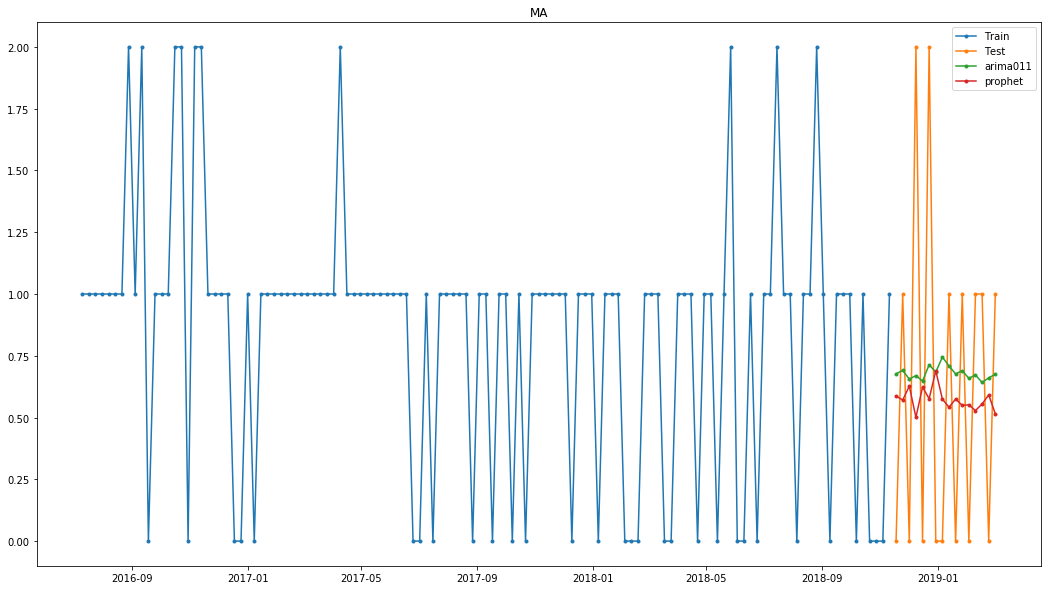

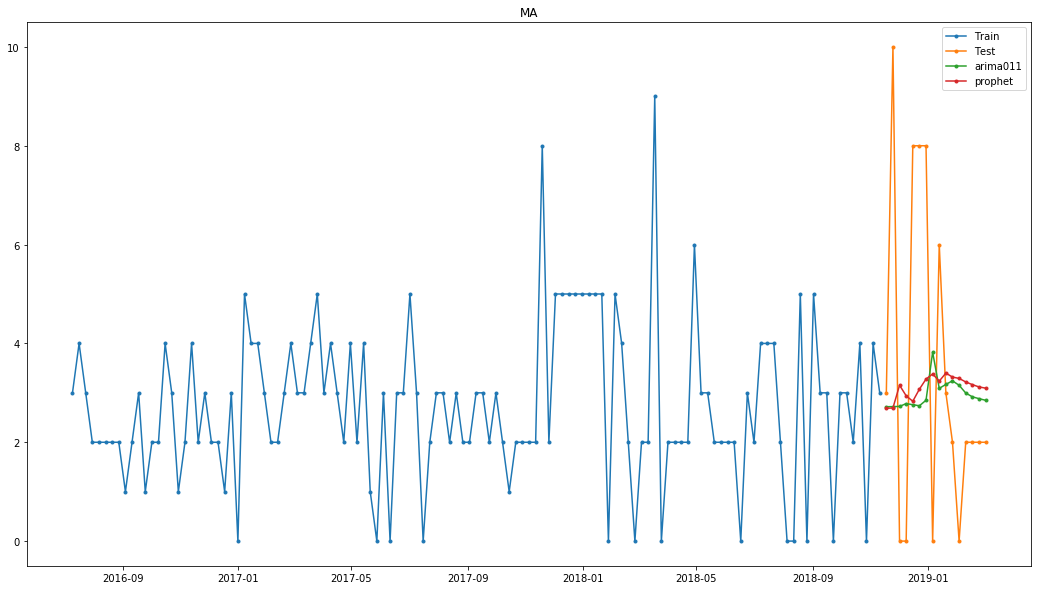

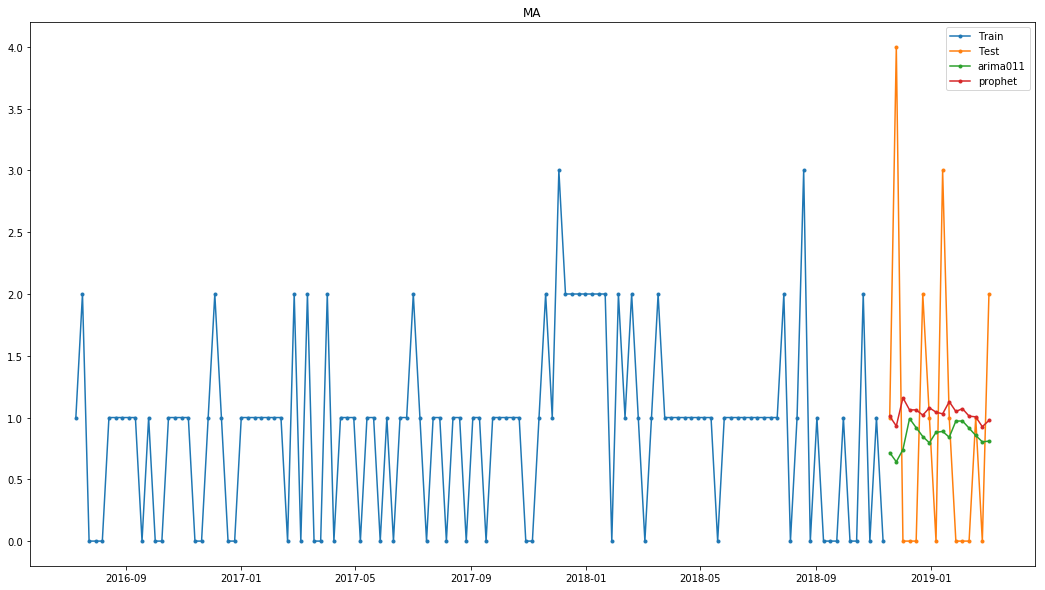

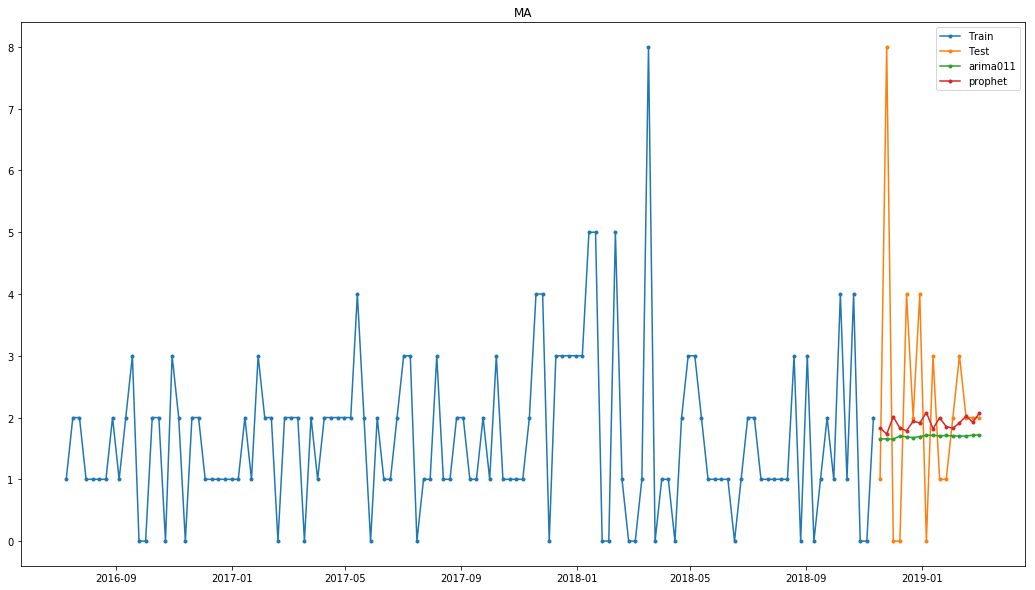

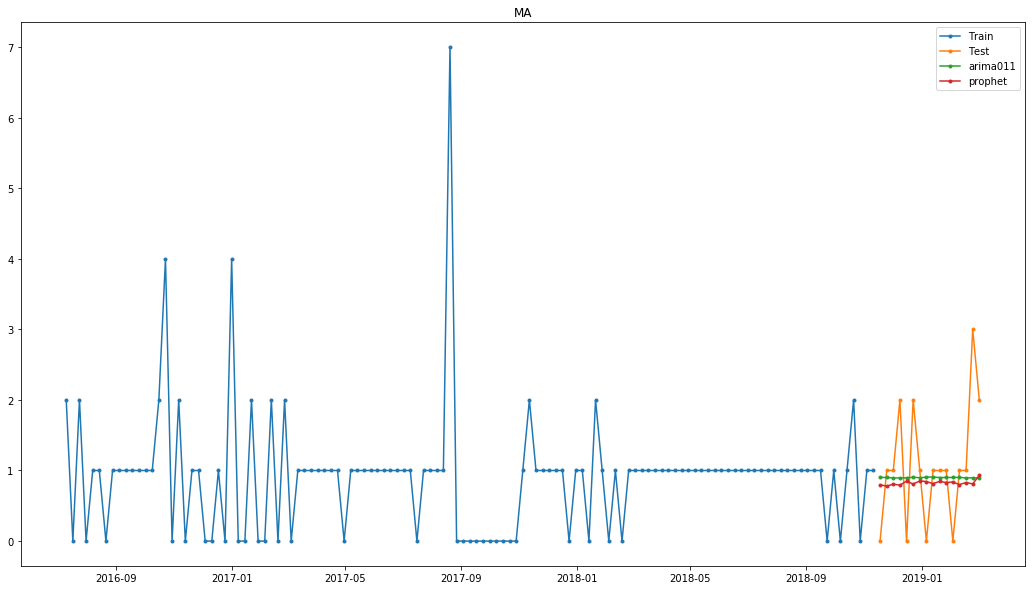

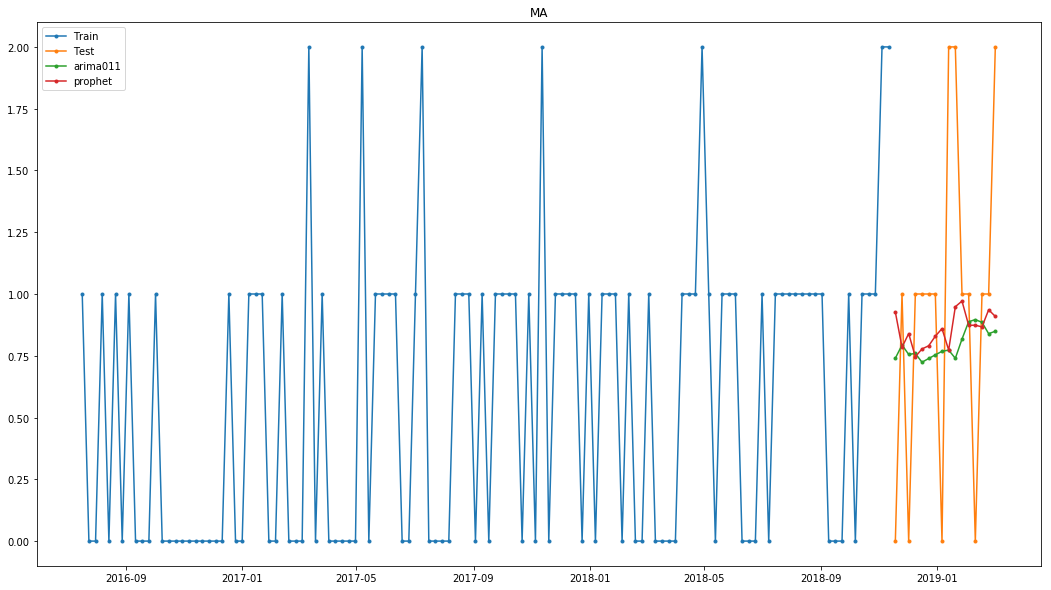

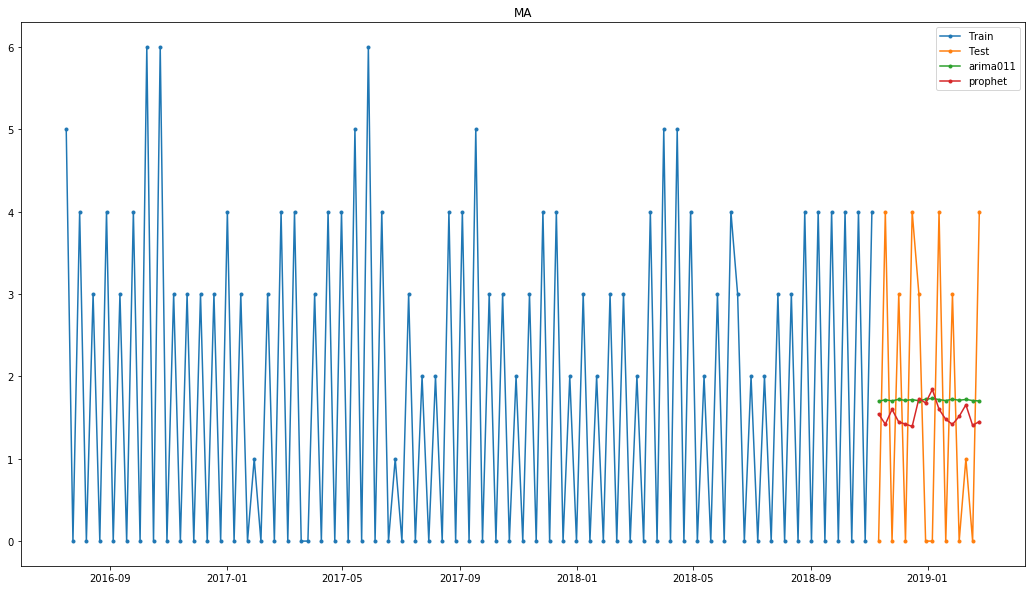

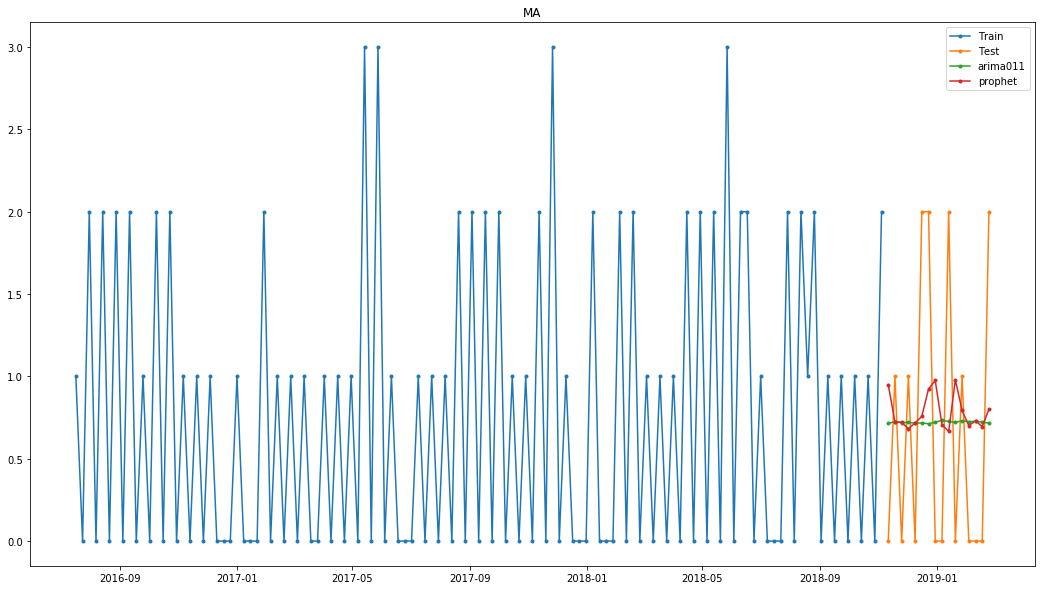

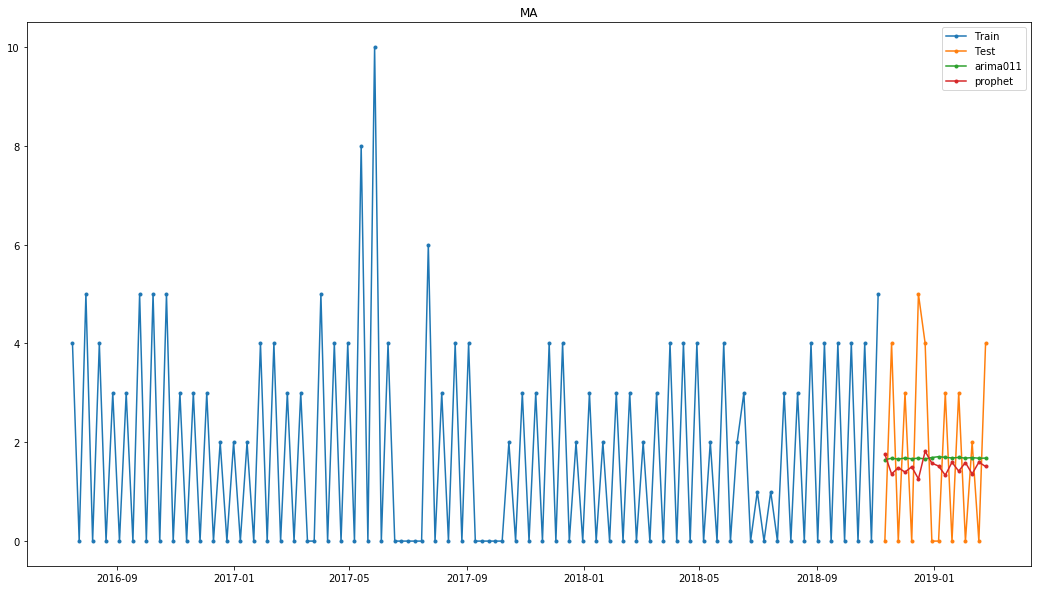

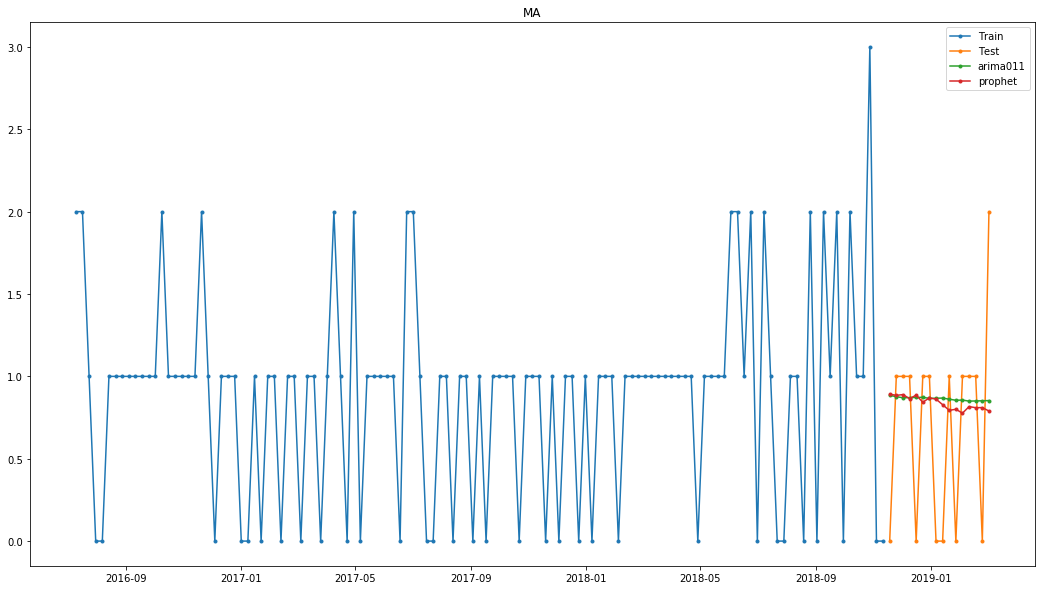

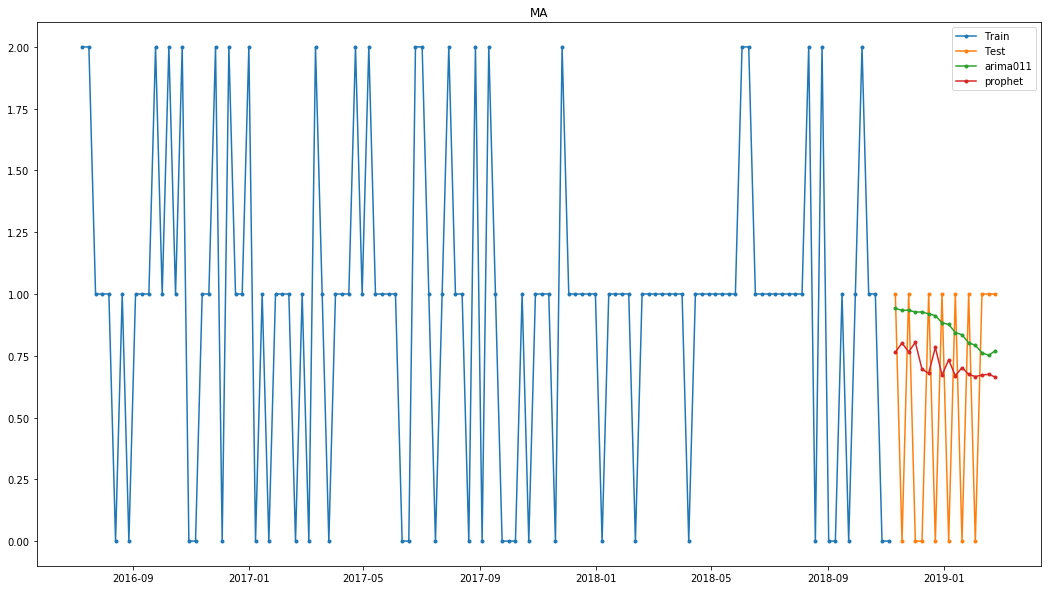

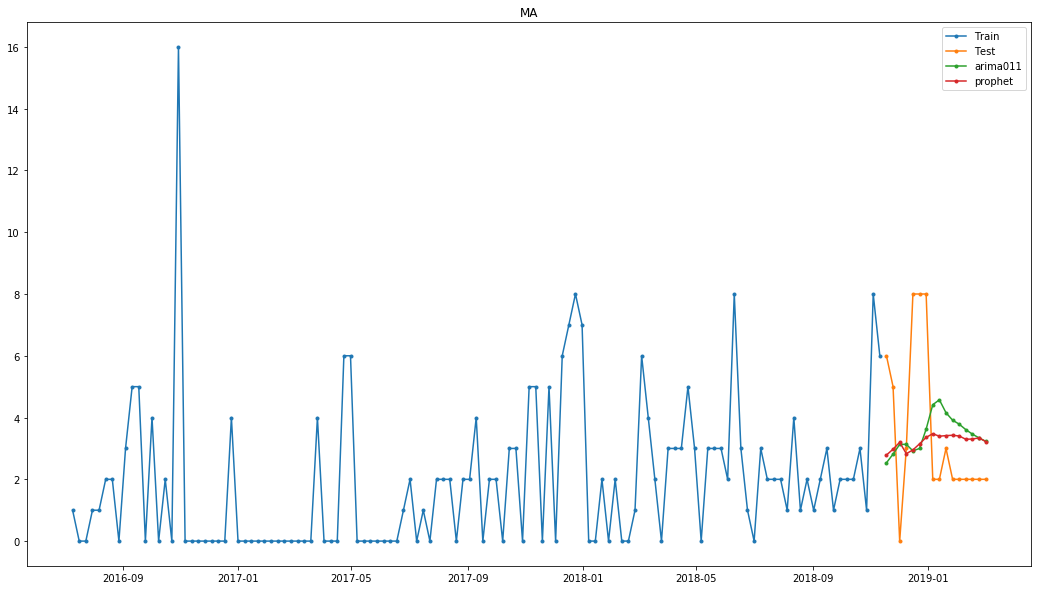

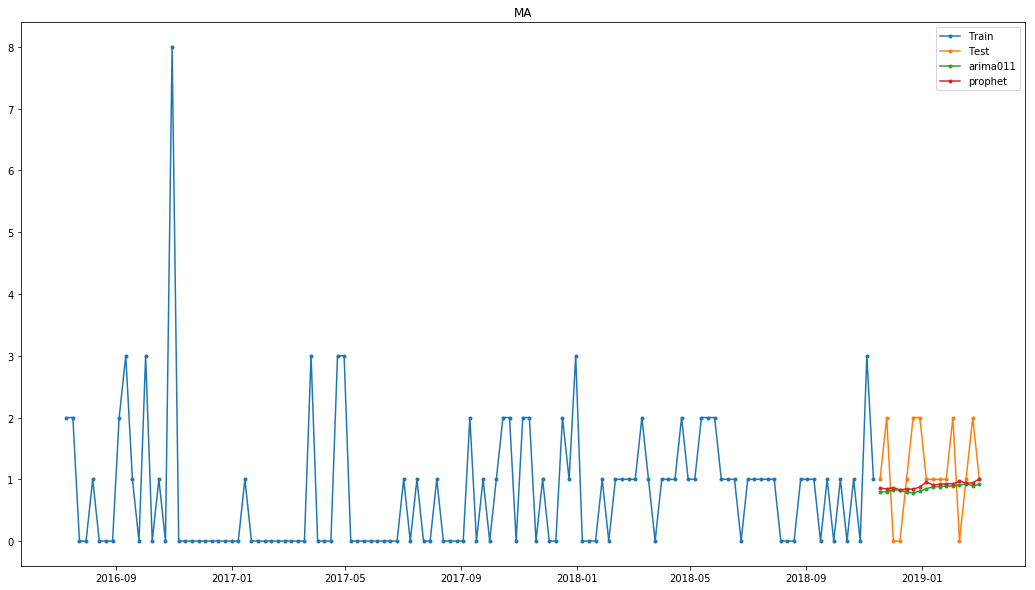

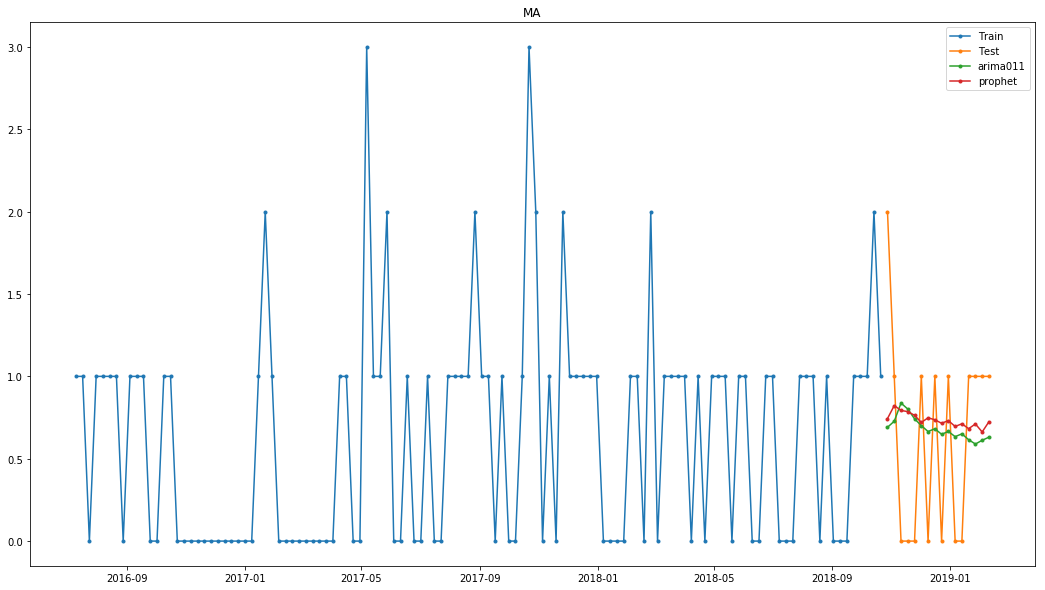

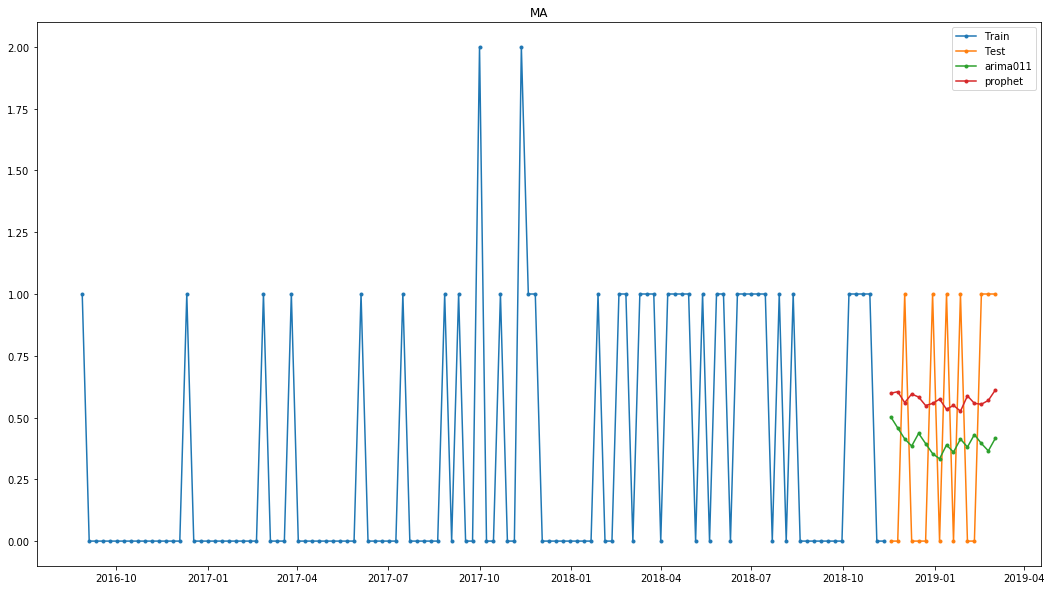

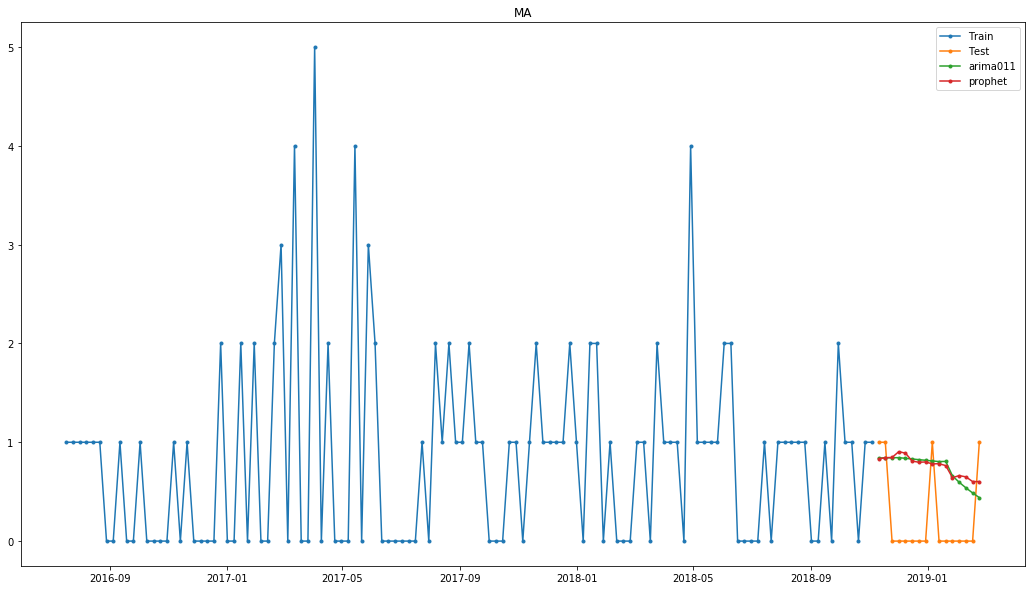

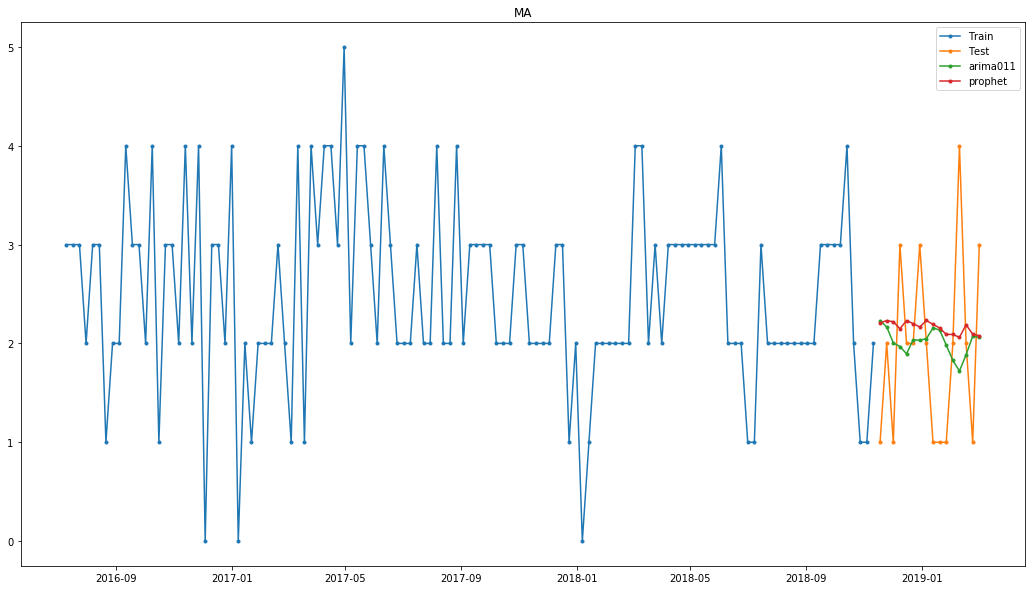

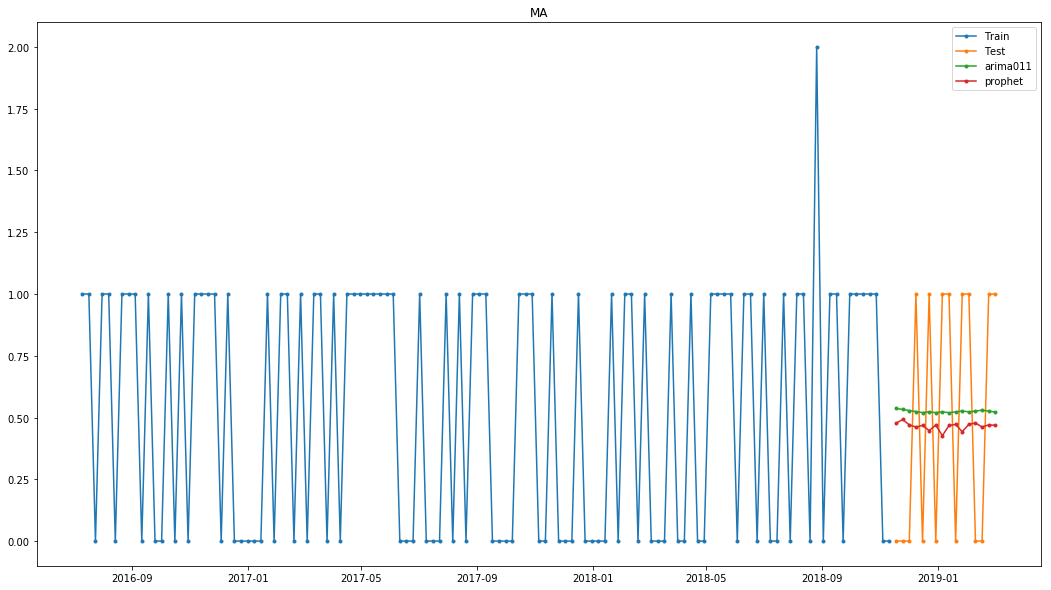

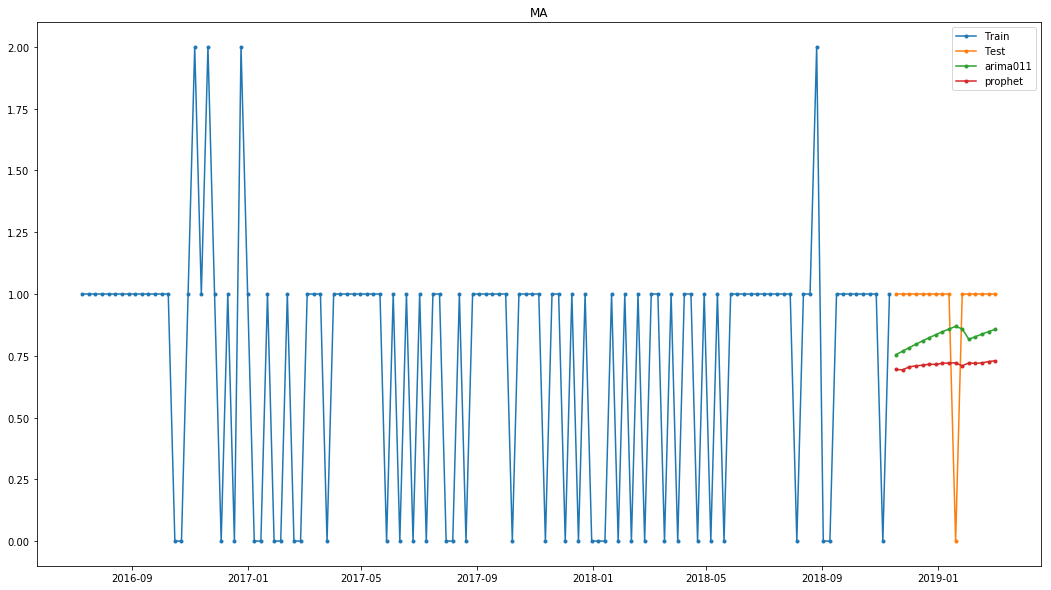

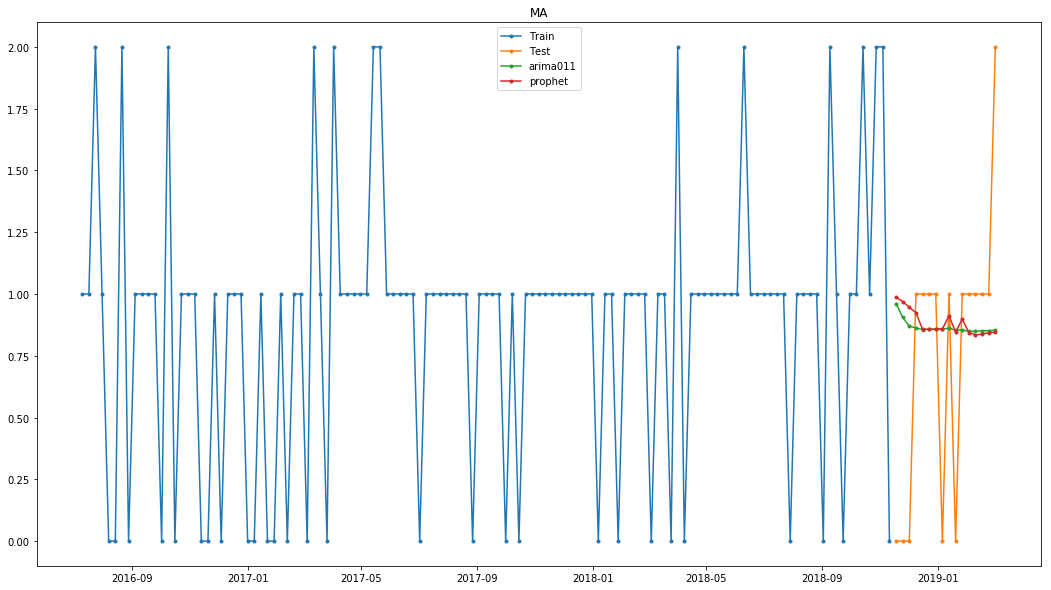

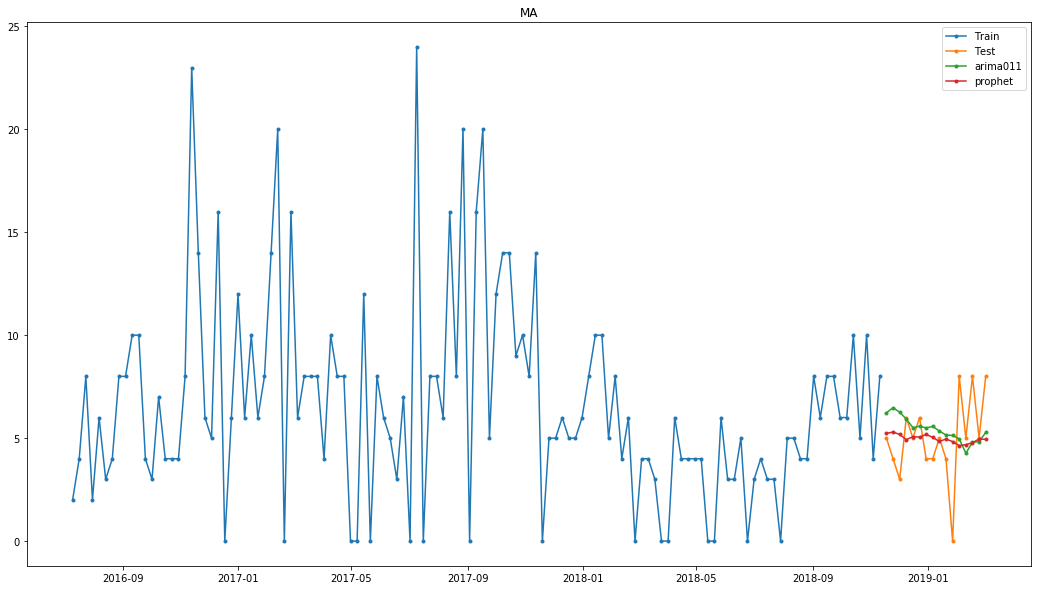

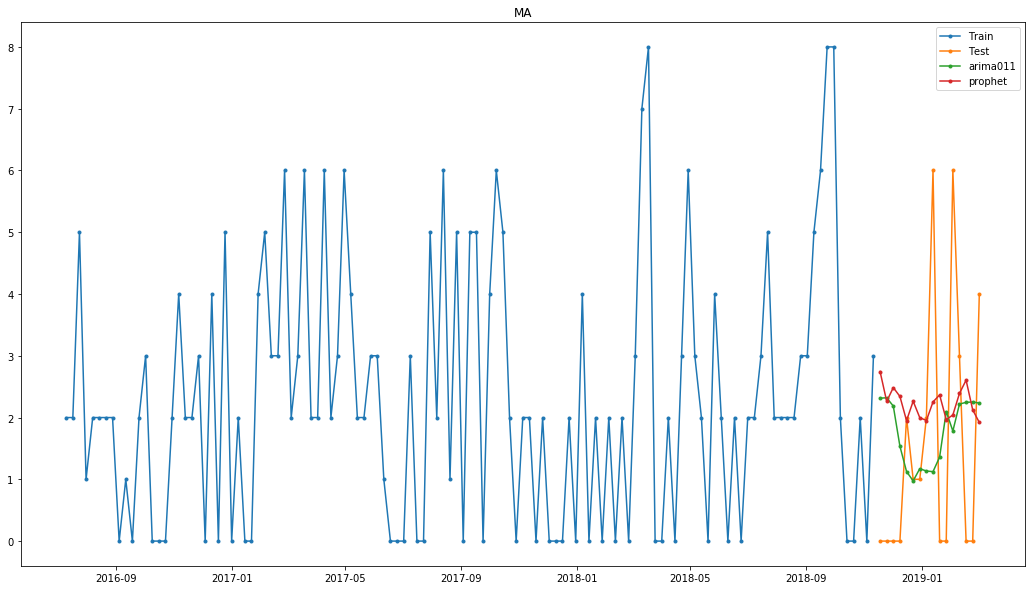

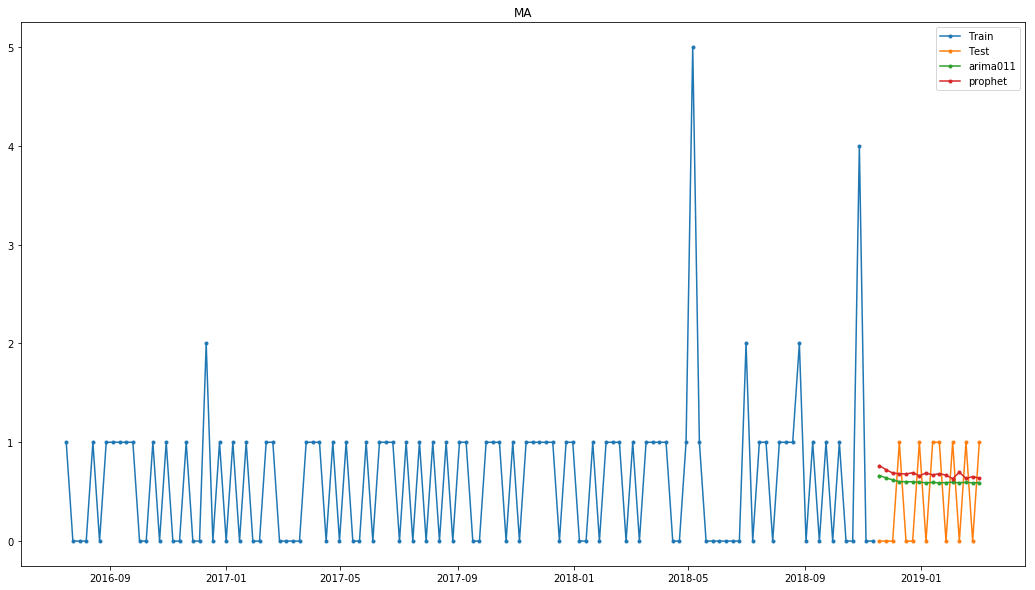

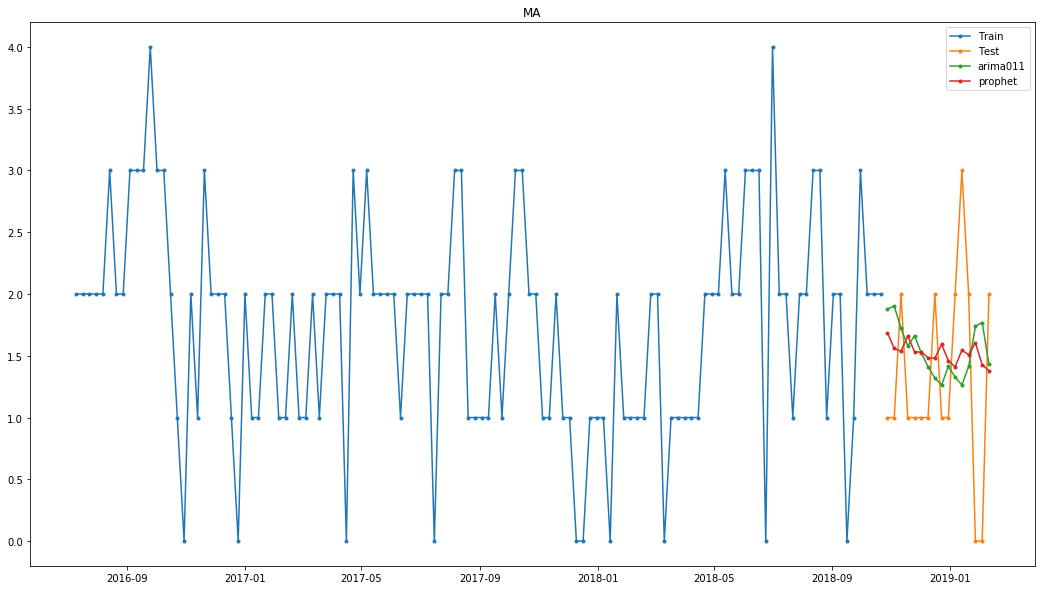

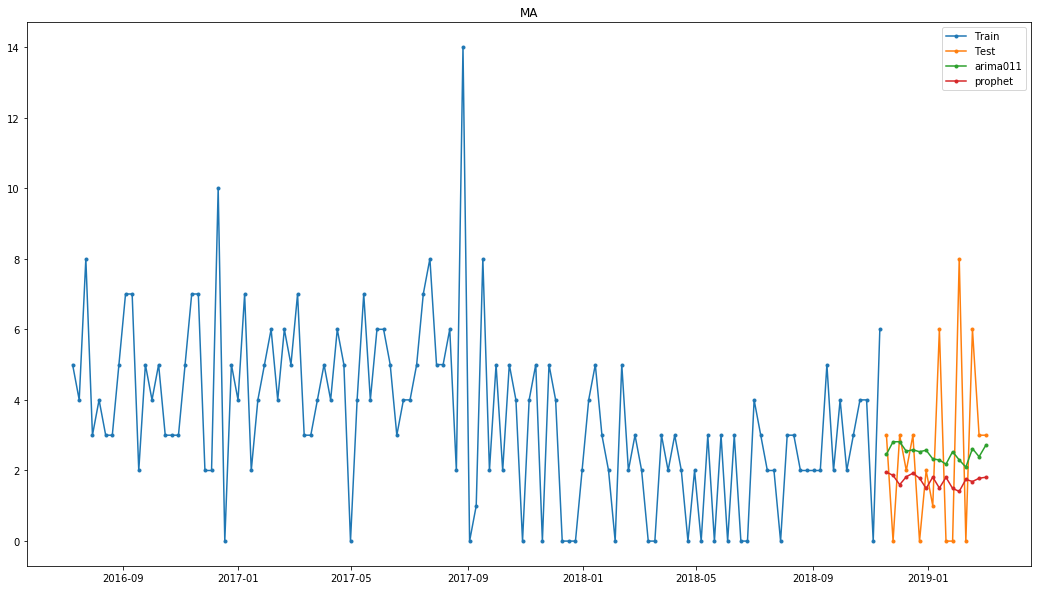

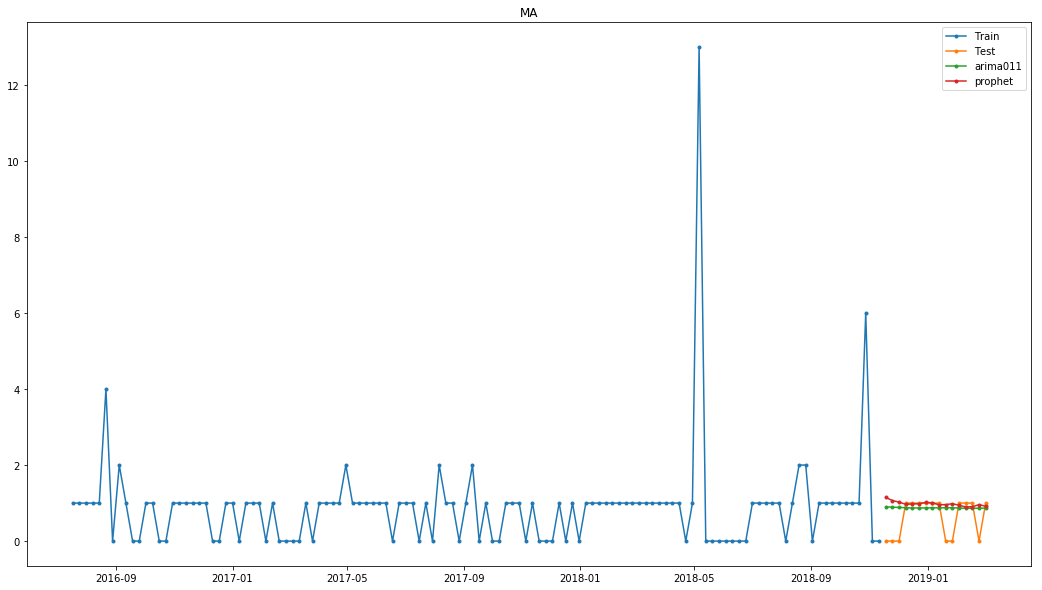

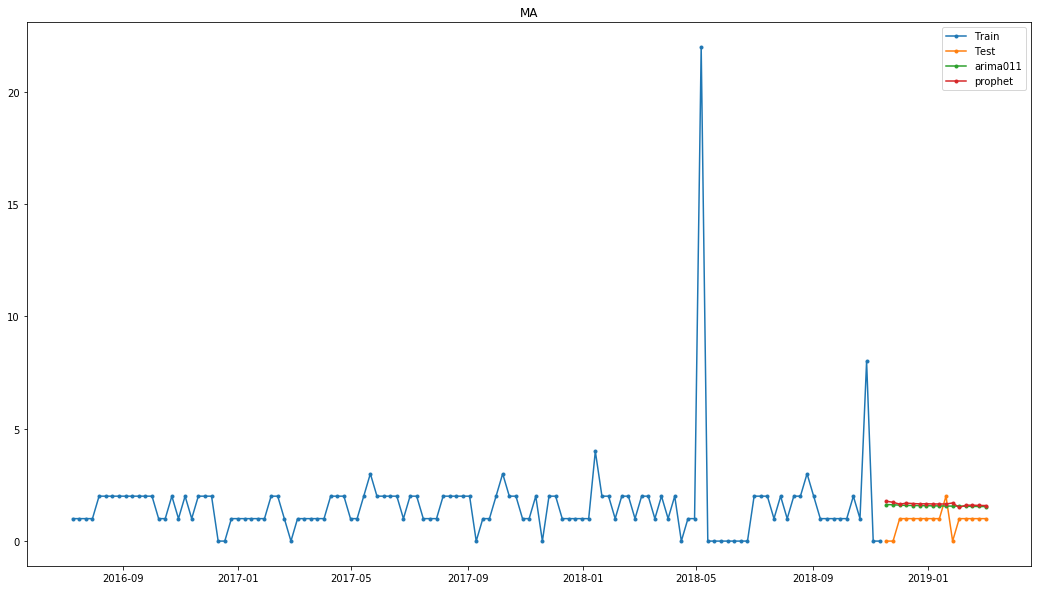

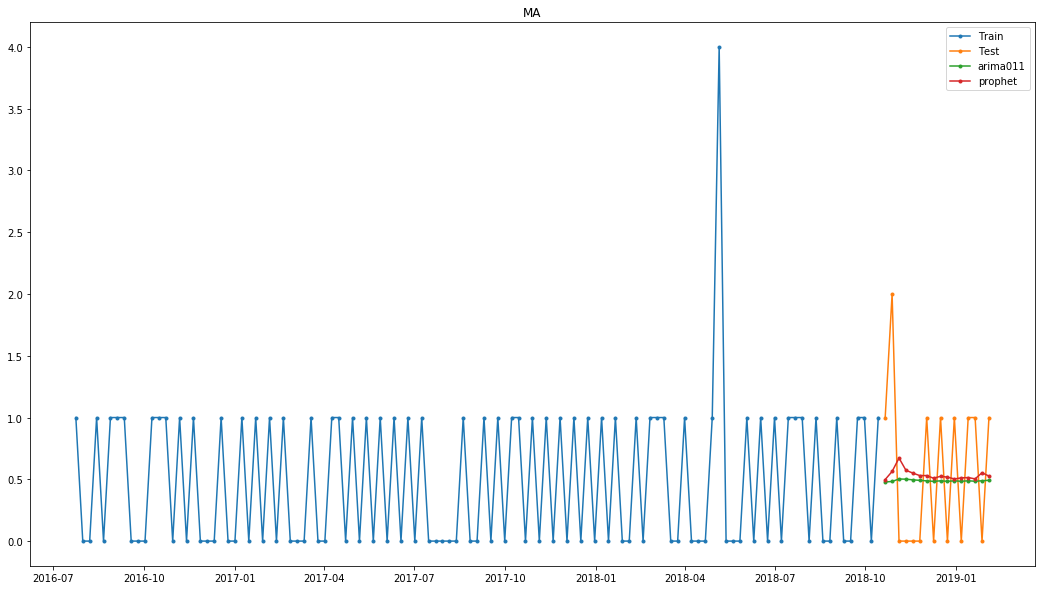

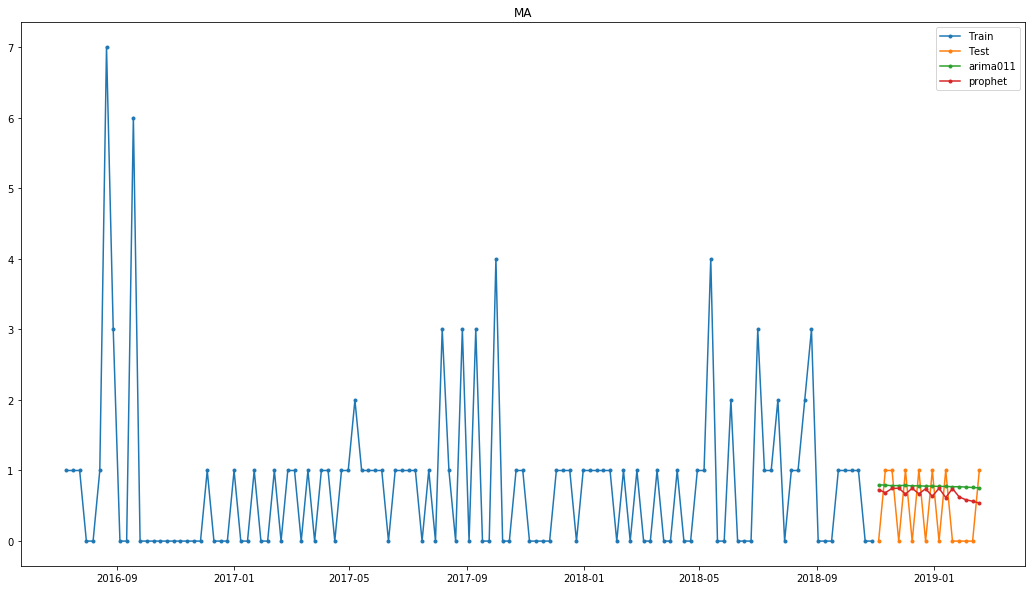

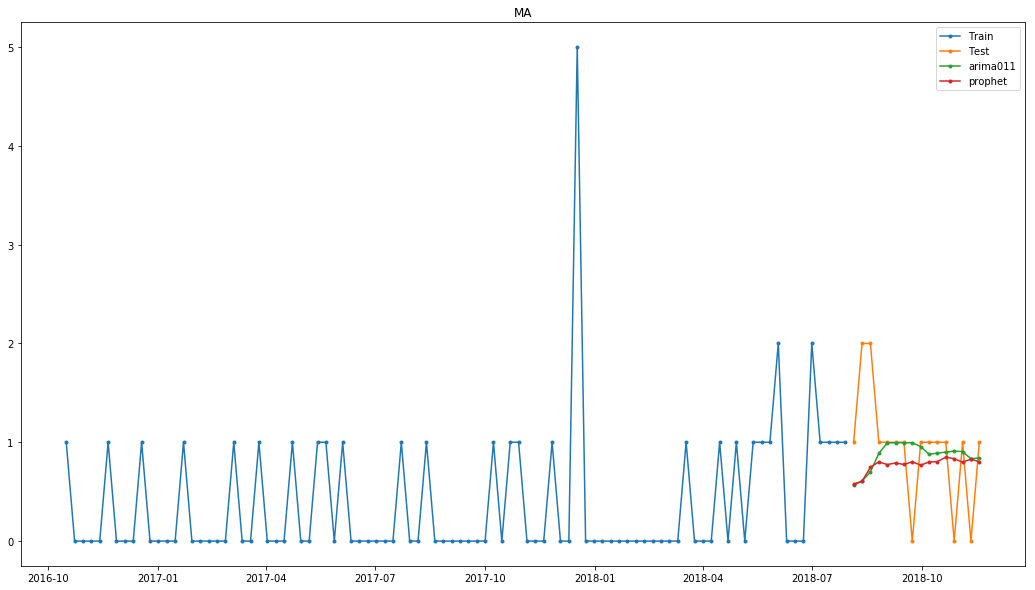

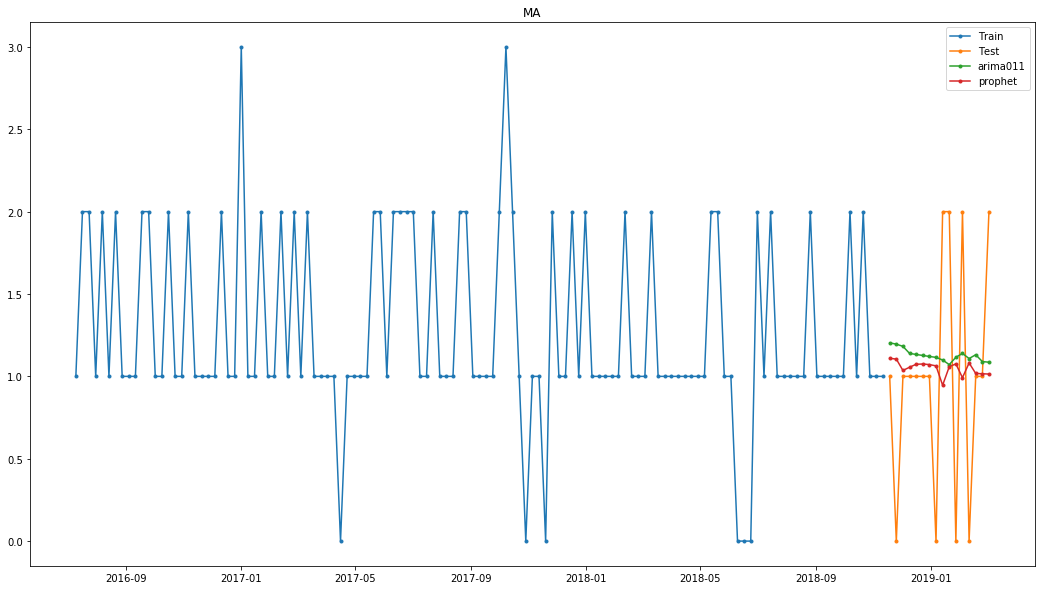

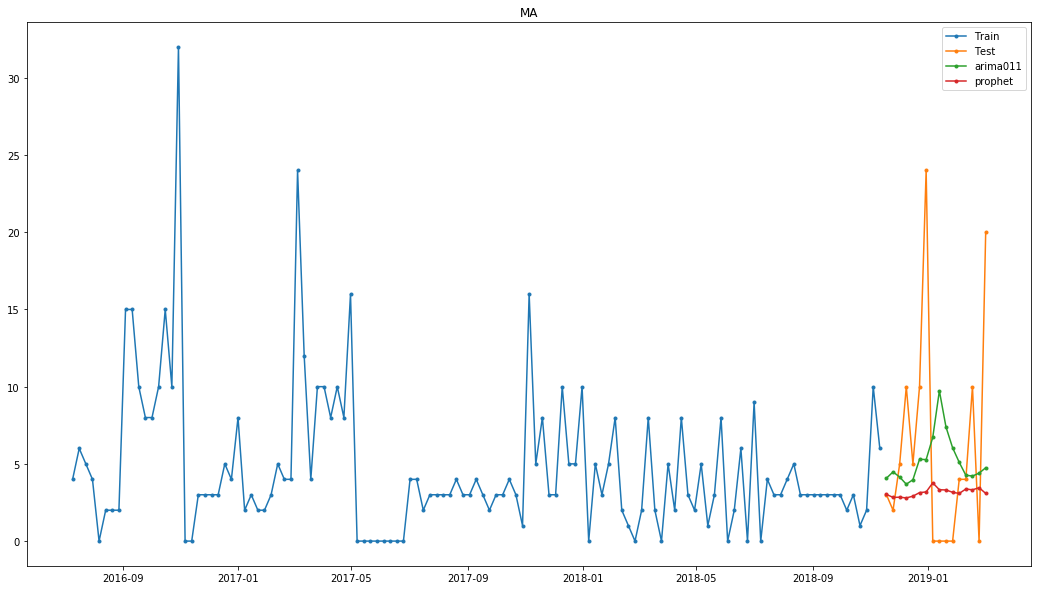

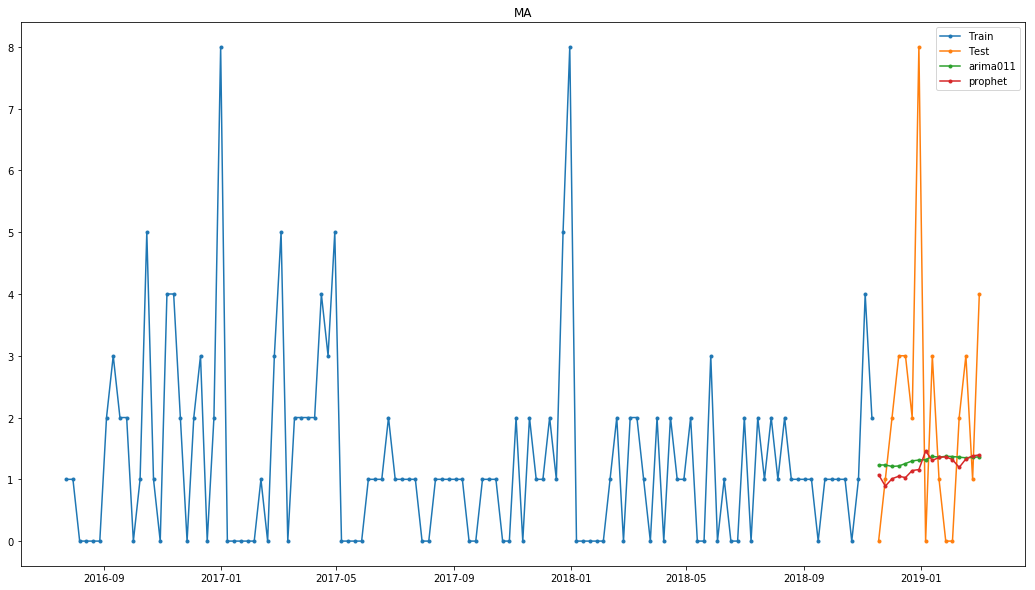

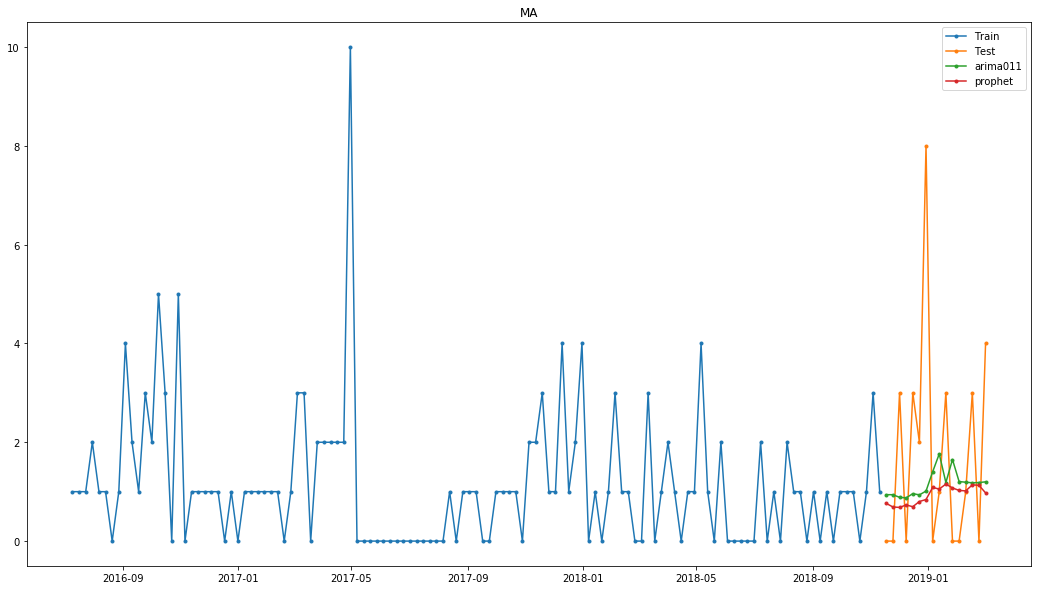

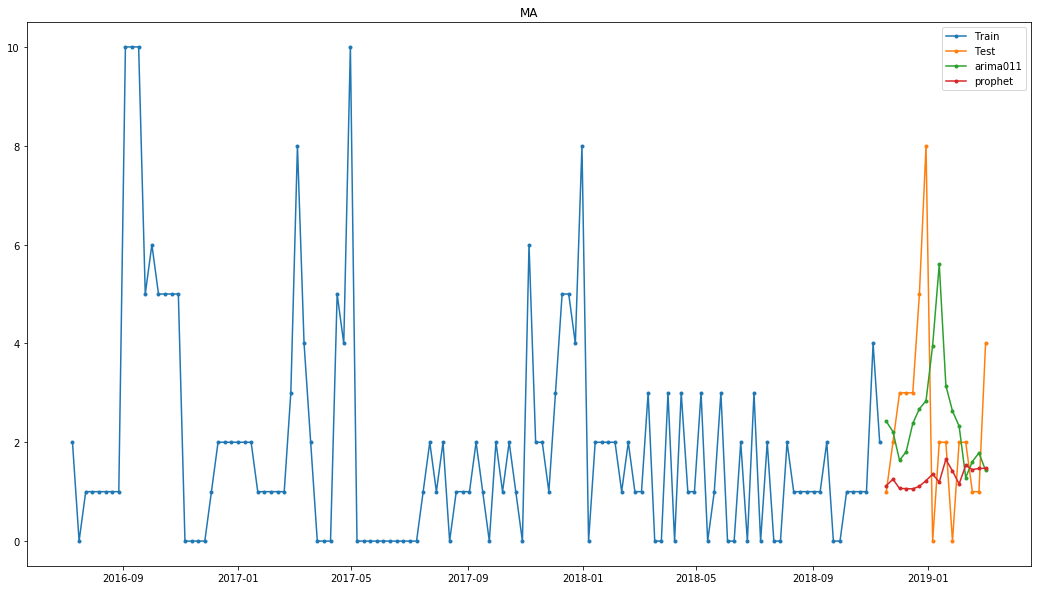

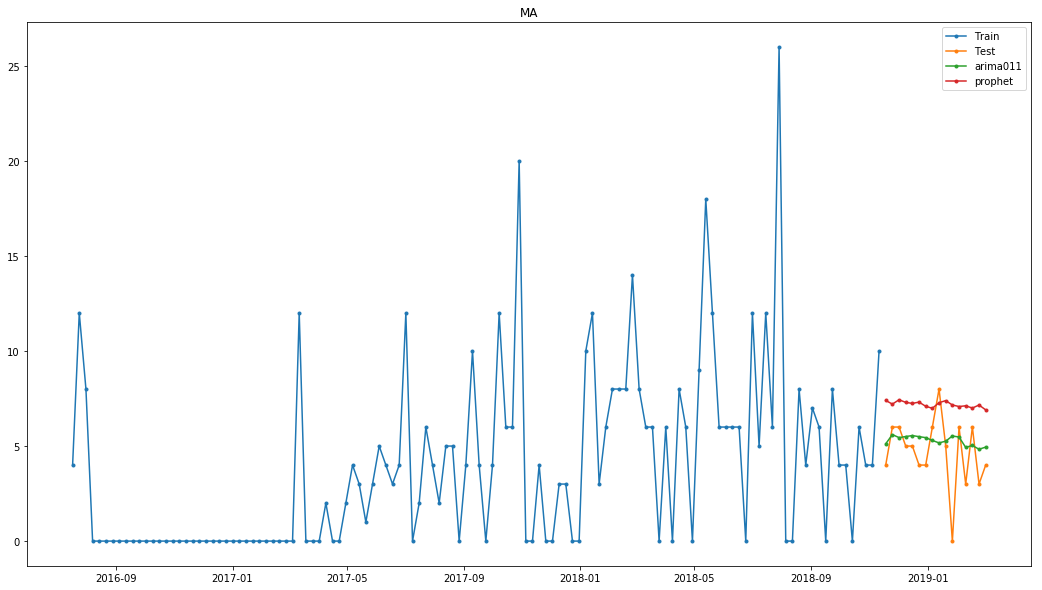

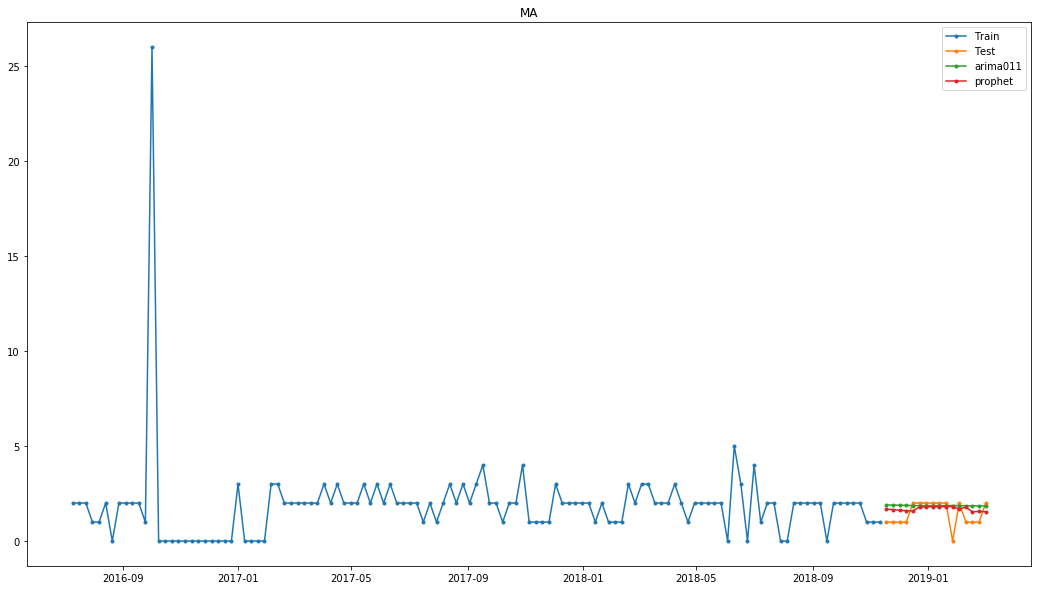

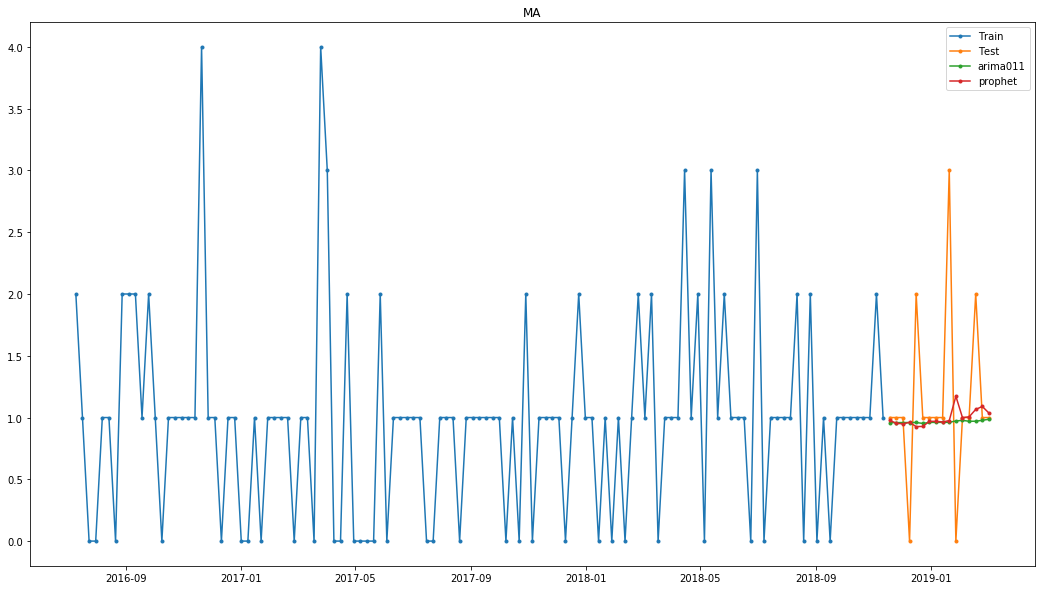

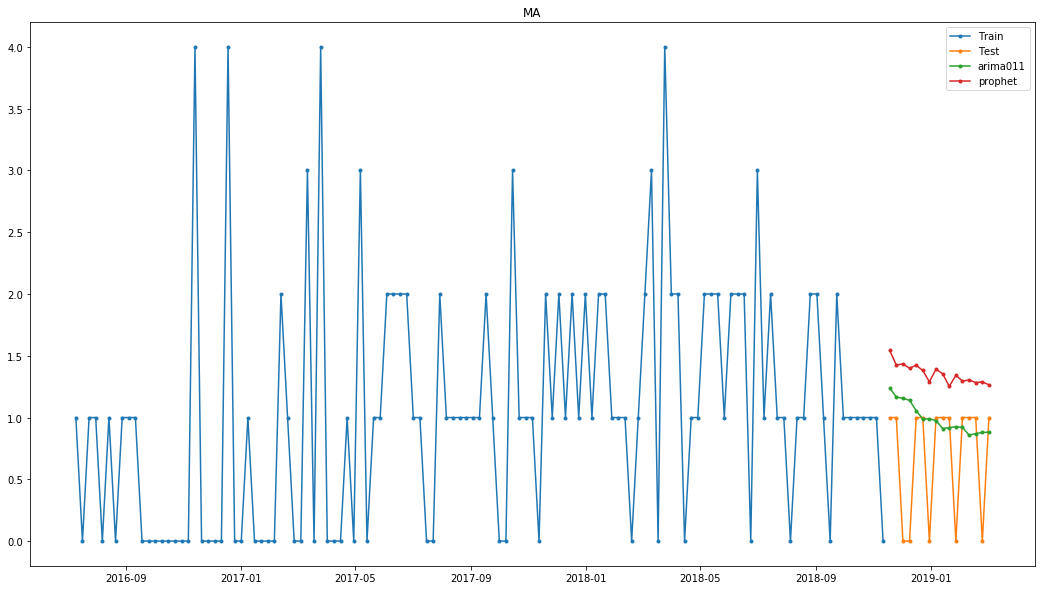

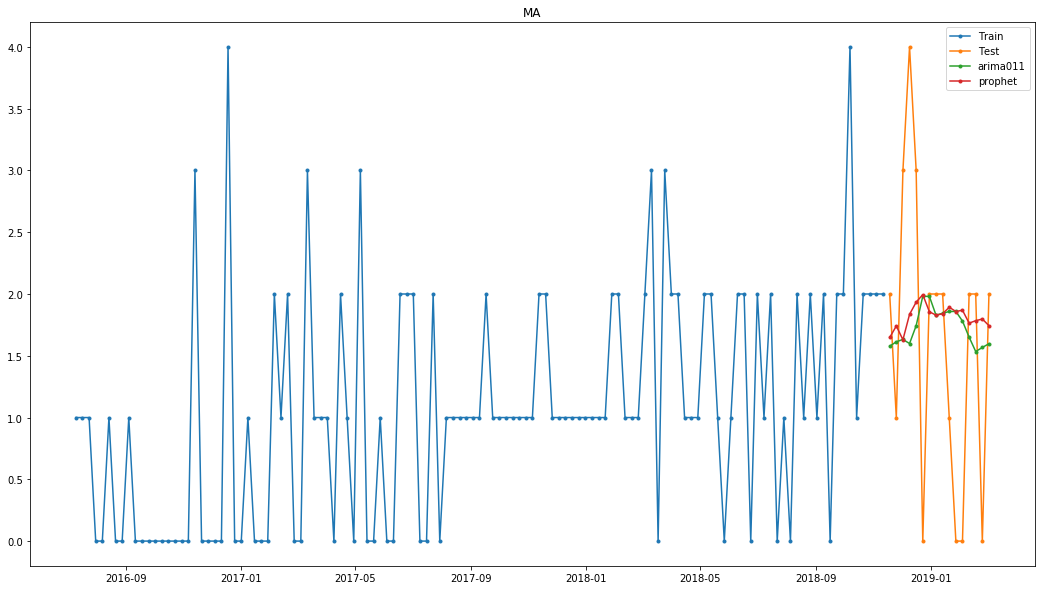

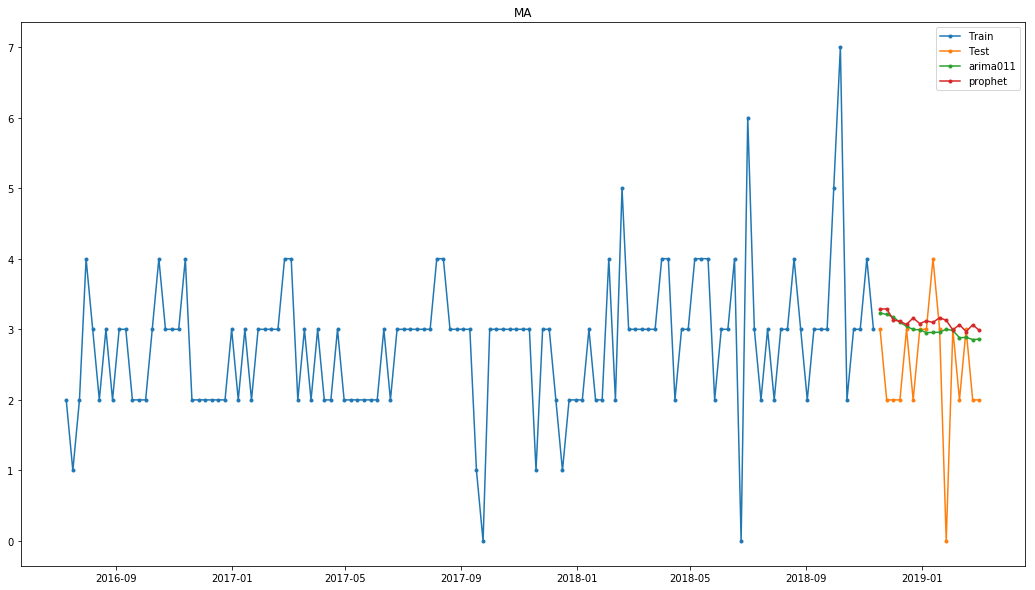

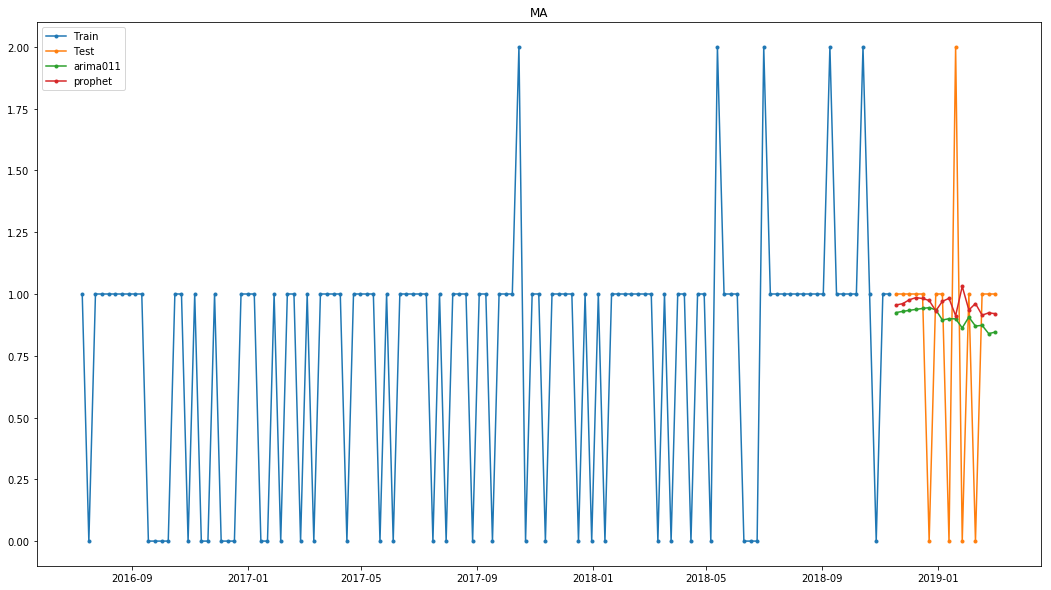

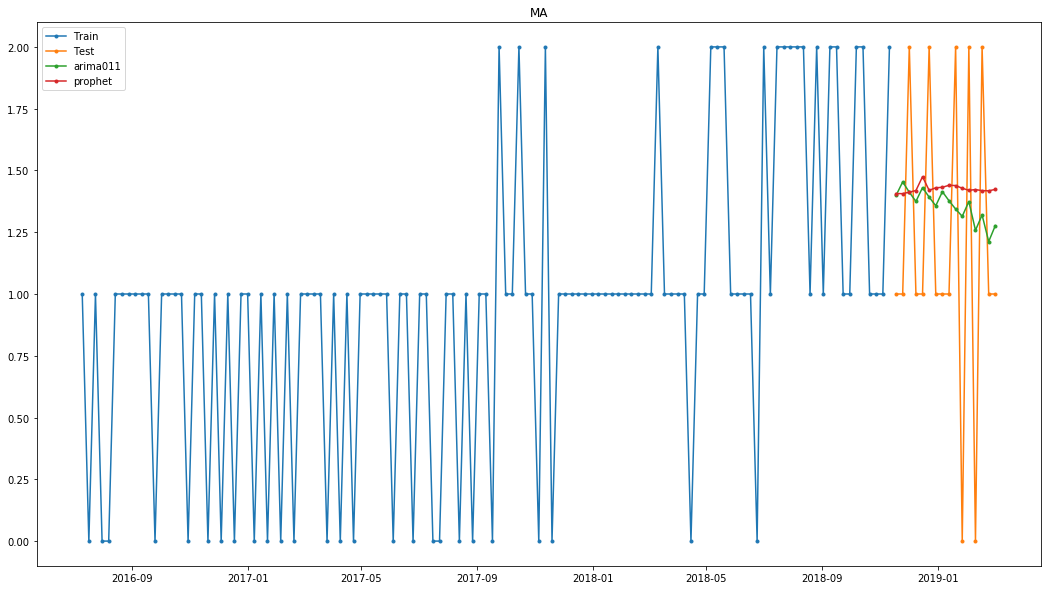

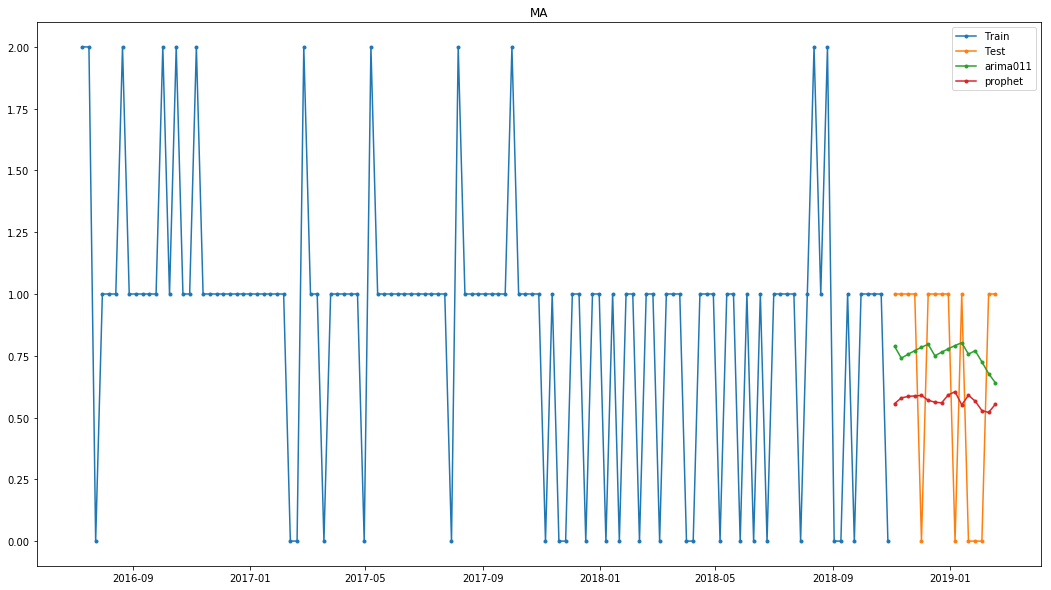

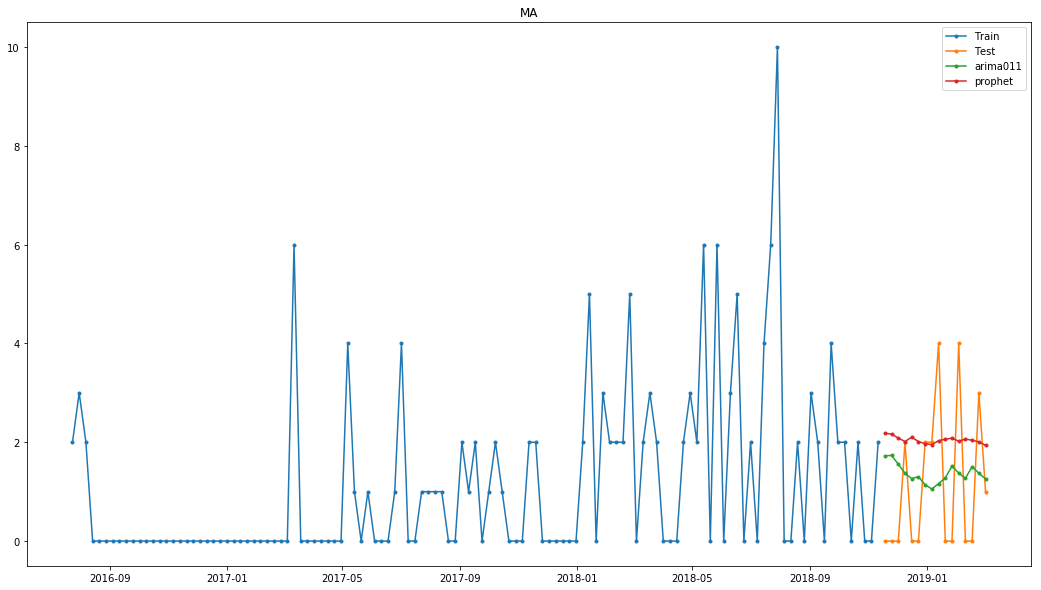

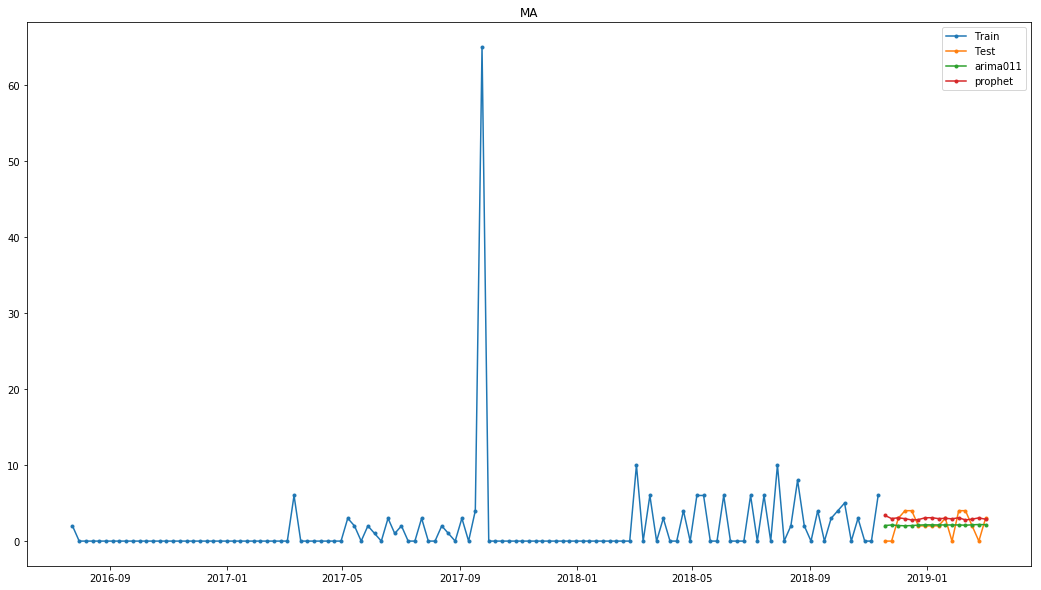

In [5]:
import os, sys
import time
start = time.time()
bucket = pd.read_csv("bucket.csv")
df = pd.read_csv("4200_C005_2019_03_03.tsv", sep=',', header=None)
df.columns = ["kunag", "matnr", "date", "quantity","price"]
p,d,q = 0,1,1 # arima parameters
sl = 0.2 #smooting coeff for SES
sps = 0.1 # seasonality_prior_scale PROPHET
# a,b = 0.2,0.2 #parameters for croston method
order = (p,q,d)
folder = 'model_graphs/'+"comp(arima_prophet)"
if not os.path.exists(folder):
        os.makedirs(folder)
n = 16
cnt = 0


# main_df = pd.DataFrame(OrderedDict({"kunag" : ["kunag"],"matnr" : ["matnr"],
#                        "sarima" : ["-"],
#                        "ses" : ["-"],
#                        "croston tsb" : "-"}))

# main_df = pd.DataFrame(OrderedDict({"kunag" : ["kunag"],"matnr" : ["matnr"],
#                        "croston tsb0.2_0.4" : "-",
#                        "croston tsb0.2_0.2" : "-",
#                        "croston tsb0.3_0.3" : "-",
#                        "croston tsb0.2_0.3" : "-",
#                        "croston tsb0.3_0.2" : "-"}))

main_df = pd.DataFrame(OrderedDict({"kunag" : ["kunag"],"matnr" : ["matnr"],
                       "arima011" : ["-"],
                       "prophet" : ["-"]}))



for i in range (1,100):
            kunag = int(bucket["kunag"].iloc[i])
            matnr = int(bucket["matnr"].iloc[i])
            index = str(kunag) +"_"+ str(matnr)
            cnt+=1
            print("count",cnt)
            print("index : ",index)
            mae1,mae2 = plot(df,kunag,matnr,n,p,d,q,sl,folder)
            
#             result_df =pd.DataFrame(OrderedDict({"kunag" : [kunag],"matnr" : [matnr],
#                    "sarima" : [round(mae1,3)],
#                    "ses" : [round(mae2,3)],
#                    "croston tsb" : [round(mae4,3)]}))
#             result_df = pd.DataFrame(OrderedDict({"kunag" : ["kunag"],"matnr" : ["matnr"],
#                        "croston tsb0.2_0.4" : [round(mae4,3)],
#                        "croston tsb0.2_0.2" : [round(mae5,3)],
#                        "croston tsb0.3_0.3" : [round(mae6,3)],
#                        "croston tsb0.2_0.3" : [round(mae7,3)],
#                        "croston tsb0.3_0.2" : [round(mae8,3)]}))

            result_df = pd.DataFrame(OrderedDict({"kunag" : [kunag],"matnr" : [matnr],
                       "arima011" : [round(mae1,3)],
                       "prophet" : [round(mae2,3)]}))

            print(result_df)
            main_df = main_df.append(result_df, ignore_index = True)
#             export_csv = main_df.to_csv (r'results/comp8(MA21,23,25).csv',sep = ",", index = None, header=True)
            
            
            
end = time.time()
print("Time Taken : ",end - start)

In [6]:
main_df
main_df = main_df[1:]
main_df.head()
print(main_df.shape)
data  = main_df
data = data.convert_objects(convert_numeric=True)
round(data.sum(axis = 0, skipna = True),3)

(99, 4)


/home/rahul/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


kunag       4.950571e+10
matnr       1.294956e+07
arima011    9.965300e+01
prophet     1.011680e+02
dtype: float64

In [7]:
export_csv = main_df.to_csv (r'results/comp(arima_prophet).csv',sep = ",", index = None, header=True)

In [8]:
data = pd.read_csv("results/comp(arima_prophet).csv",sep = ",")

In [9]:
data.head()

kunag   matnr  arima011  prophet
0  500056565  100278     1.000    1.448
1  500056565  116366     1.670    1.679
2  500056565  117803     0.507    0.515
3  500056565  119826     0.422    0.456
4  500056565  132218     0.589    0.609

In [10]:
minimum = data.idxmin(axis=1)

In [11]:
a = 0
s = 0
c = 0
for i in range(0,len(minimum)):
    if(minimum[i]=="arima011"):
        a+=1
    elif(minimum[i]=="prophet"):
        s+=1
#     elif(minimum[i]=="MA_26"):
#         c+=1
print(a)
print(s)
# print(c)

65
34


In [ ]:
start = time.time()
bucket = pd.read_csv("bucket.csv")
df = pd.read_csv("4200_C005_2019_03_03.tsv", sep=',', header=None)
df.columns = ["kunag", "matnr", "date", "quantity","price"]


# Path to be created
# path = '/home/rahul/Downloads/bharat/time_series1/arima010'
# if os.path.isfile(path):
#     pass
# else :
#     os.makedirs( path, 493 )

# main_df = pd.DataFrame(OrderedDict({"kunag" : ["-"],
#                     "matnr" : ["-"],
#                     "window8" : ["-"],
#                    "window12" : ["-"],
#                    "window16" : ["-"],
#                    "window20" : ["-"],
#                    "window24" : ["-"],
#                    "window28" : ["-"],
#                    "window30" : ["-"]}))


# m_df = pd.DataFrame({"kunag" : ["kunag"],"matnr" : ["matnr"], "a1" : ["-"],"a2" : ["-"]})

main_df =pd.DataFrame(OrderedDict({"kunag" : ["kunag"],
                    "matnr" : ["matnr"],
                    "window22" : ["-"],
                   "window24" : ["-"],
                   "window26" : ["-"]}))
export_csv= main_df.to_csv (r'results/model_all11.csv',sep = ",", index = None, header=True)

cnt = 0
for i in range (1,5):
            kunag = int(bucket["kunag"].iloc[i])
            matnr = int(bucket["matnr"].iloc[i])
            index = str(kunag) +"_"+ str(matnr)
            print("count",cnt)
            print("index : ",index)
#             print("window :", 4)
#             output1,rms1,mae1 = moving_average(df,kunag,matnr,16,8)
#             output4,rms4,mae4 = ses(df,kunag,matnr,16,0)
#             output2,rms2,mae2 = sarima(df,kunag,matnr,16,0,1,1)

            print("window :", 22)
            output1,rms1,mae1 = moving_average(df,kunag,matnr,16,22)
            print("window :", 24)
            output2,rms2,mae2 = moving_average(df,kunag,matnr,16,24)
            print("window :", 26)
            output3,rms3,mae3 = moving_average(df,kunag,matnr,16,26)
#             print("window :", 20)
#             output4,rms4,mae4 = moving_average(df,kunag,matnr,16,20)
#             print("window :", 24)
#             output5,rms5,mae5 = moving_average(df,kunag,matnr,16,24)
#             print("window :", 28)
#             output6,rms6,mae6 = moving_average(df,kunag,matnr,16,28)
#             print("window :", 30)
#             output7,rms7,mae7 = moving_average(df,kunag,matnr,16,30)
            result_df =pd.DataFrame(OrderedDict({"kunag" : [kunag],
                                "matnr" : [matnr],
                                "window22" : [round(mae1,3)],
                               "window24" : [round(mae2,3)],
                               "window26" : [round(mae3,3)]}))


#             result_df =pd.DataFrame(OrderedDict({"kunag" : [kunag],
#                     "matnr" : [matnr],
#                     "window8" : [round(mae1,3)],
#                    "window12" : [round(mae2,3)],
#                    "window16" : [round(mae3,3)],
#                    "window20" : [round(mae4,3)],
#                    "window24" : [round(mae5,3)],
#                    "window28" : [round(mae6,3)],
#                    "window30" : [round(mae7,3)]}))
                                                 
                                                 
#             result_df = pd.DataFrame({"kunag" : [kunag],"matnr" : [matnr], "a1" : [mae1],"a2" : [mae4]})
#             print("MAE : ",mae1)
#             print(output1)
        
#             print(output2)
            print(result_df["window22"].values[0])
            main_df = main_df.append(result_df, ignore_index = True) 
#             export_csv= main_df.to_csv (r'results/model_all.csv',sep = ",", index = None, header=True)#             print(main_df)
                      
            with open(r'results/model_all11.csv', 'a') as csvfile:
                fieldnames=['kunag','matnr','window22','window24','window26'] 
                writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
#                 writer.writeheader()
                writer.writerow({'kunag' : kunag,'matnr' : matnr,'window22' : result_df["window22"].values[0],'window24' : result_df["window24"].values[0],'window26' : result_df["window26"].values[0]})
#             export_csv= main_df.to_csv (r'results/model_all.csv',sep = ",", index = None, header=True)#             print(main_df)
            cnt+=1
#             if(cnt == 5):                     
#                 break 
# print(main_df)
end = time.time()
print("Time Taken : ",end - start)